# Import Data

In [1]:
# Data: https://www.kaggle.com/wendykan/lending-club-loan-data/data
loan <- read.csv("C:/Users/yuanq/Desktop/bittiger/loan.csv", stringsAsFactors = FALSE)
loanT <- loan

# Import Library

In [2]:
library(ggplot2)
library(tidyverse)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.3.4     v purrr   0.2.4
v tidyr   0.7.2     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.2.0
v tibble  1.3.4     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Missing Value

In [4]:
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)

In [5]:
dfnum.NA <- data.frame(name=names(num.NA), per50 = num.NA/nrow(loan)>=0.5,percentage=num.NA/dim(loan)[1], row.names = NULL)

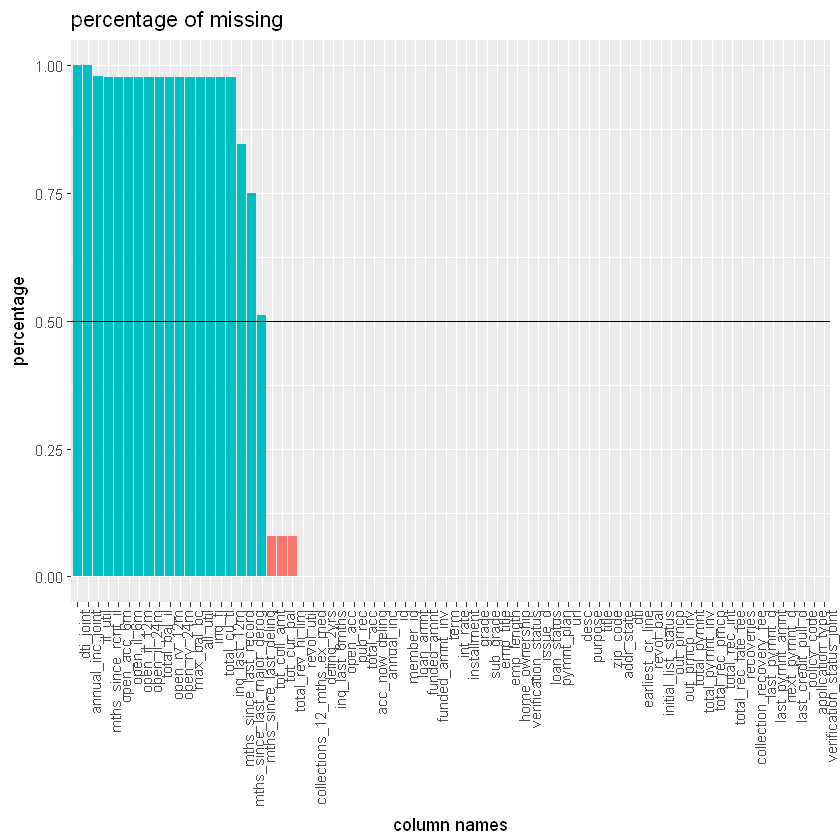

In [6]:
ggplot(data = dfnum.NA, aes(x=name, y=percentage)) + 
  geom_bar(aes(fill=per50), stat="identity") + 
  scale_x_discrete(name ="column names", 
                   limits=dfnum.NA$name)+
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=1),
        legend.position = "none") +
  geom_hline(yintercept = 0.5) + 
  ggtitle("percentage of missing")

### Keep the column that its missing value less than 50%

In [7]:
remain.col <- names(num.NA)[which(num.NA <= 0.5 * dim(loan)[1])]
loan <- loan[, remain.col]

In [8]:
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)
head(num.NA)

tot_coll_amt                tot_cur_bal 
                     70276                      70276 
          total_rev_hi_lim                 revol_util 
                     70276                        502 
collections_12_mths_ex_med                delinq_2yrs 
                       145                         29

### Target-loan_status

In [9]:
table(loan$loan_status)


                                        Charged Off 
                                              45248 
                                            Current 
                                             601779 
                                            Default 
                                               1219 
Does not meet the credit policy. Status:Charged Off 
                                                761 
 Does not meet the credit policy. Status:Fully Paid 
                                               1988 
                                         Fully Paid 
                                             207723 
                                    In Grace Period 
                                               6253 
                                             Issued 
                                               8460 
                                  Late (16-30 days) 
                                               2357 
                                 Late (31-120

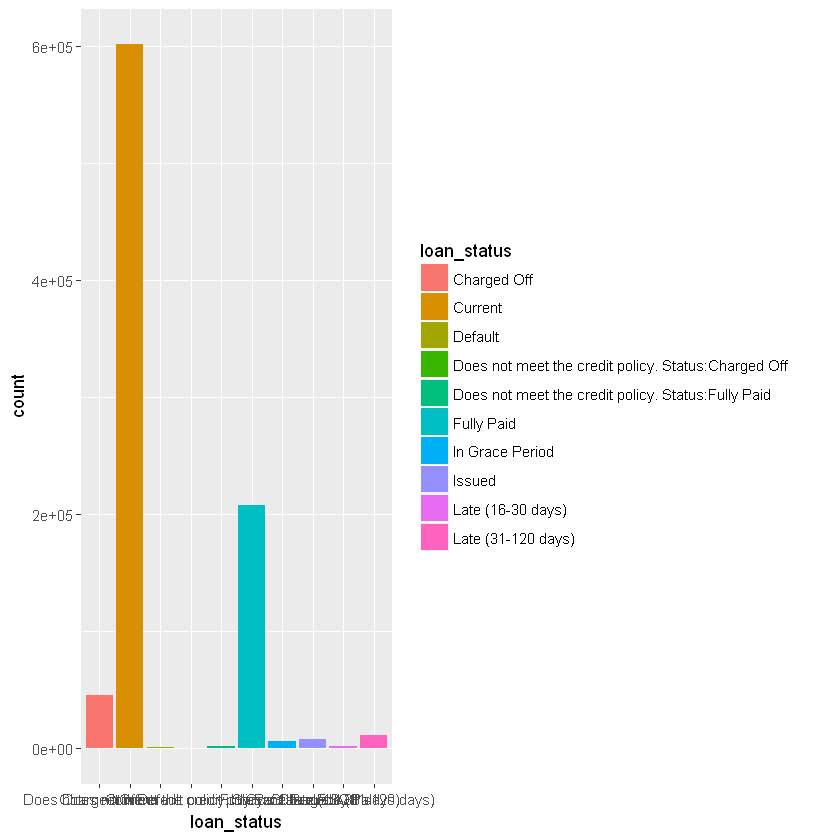

In [10]:
ggplot(data = loan) + geom_bar(mapping = aes(x = loan_status, fill = loan_status))

In [11]:
# remove certain string from loan_status
loan$loan_status <- gsub('Does not meet the credit policy. Status:','', loan$loan_status)

In [12]:
table(loan$loan_status)


       Charged Off            Current            Default         Fully Paid 
             46009             601779               1219             209711 
   In Grace Period             Issued  Late (16-30 days) Late (31-120 days) 
              6253               8460               2357              11591 

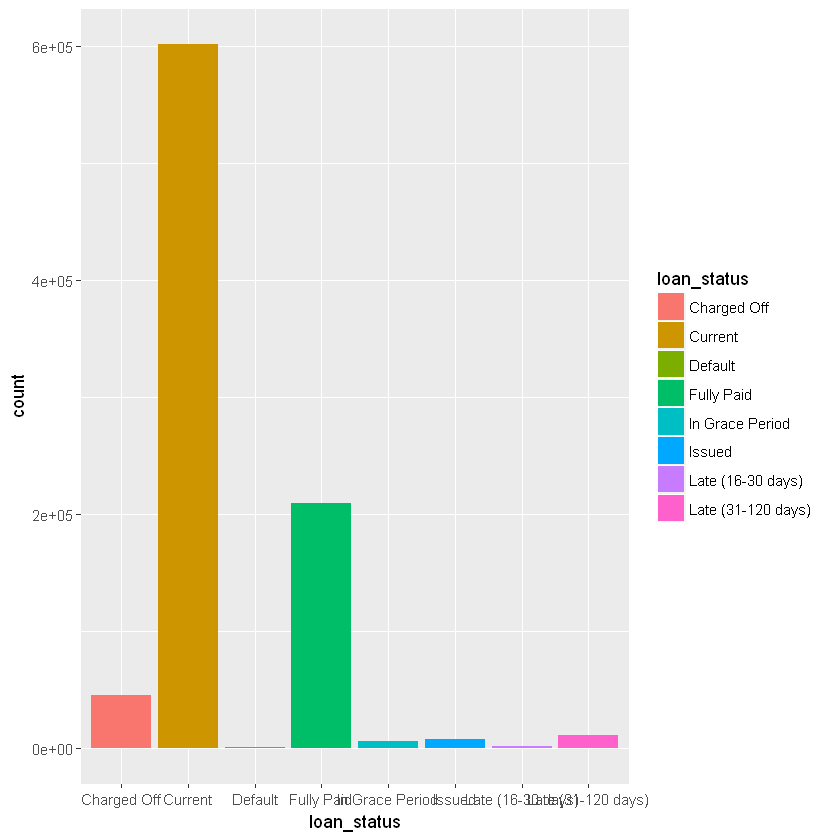

In [13]:
ggplot(data = loan) + geom_bar(mapping = aes(x = loan_status, fill = loan_status))

 - How to generate a new feature for target(default)
 - Does an unbalanced sample matter?

 - Completed or fully paid:	All paid off
 - Current:	All past payments on time and as agreed,  not fully paid off yet.
 - In grace period:	Loan is past due but within the 15-day grace period. 
 - Default:	121+ days past due.
 - Charged off:	150 days past due
 - understand loan status: https://www.orchardplatform.com/blog/understanding-loan-statuses/
 - What do the different loan status mean: https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-

Find out pattern based on the next payment date

In [3]:
table(loan$next_pymnt_d)


         Apr-2008 Apr-2009 Apr-2010 Apr-2011 Apr-2012 Apr-2013 Apr-2014 
  252971        4       10       31      101       49       43        3 
Apr-2015 Aug-2008 Aug-2009 Aug-2010 Aug-2011 Aug-2012 Aug-2013 Aug-2014 
       7       10       32       54       57       31       22        2 
Aug-2015 Dec-2007 Dec-2008 Dec-2009 Dec-2010 Dec-2011 Dec-2012 Dec-2013 
       9        1       51       53       71       43       36       25 
Dec-2014 Dec-2015 Feb-2008 Feb-2009 Feb-2010 Feb-2011 Feb-2012 Feb-2013 
       4        2        2        5       29       91       26       42 
Feb-2014 Feb-2015 Feb-2016 Jan-2008 Jan-2009 Jan-2010 Jan-2011 Jan-2012 
      10        4   553406        4       14       20       79       45 
Jan-2013 Jan-2014 Jan-2015 Jan-2016 Jul-2008 Jul-2009 Jul-2010 Jul-2011 
      29       18        3    78195        3       16       49       53 
Jul-2012 Jul-2013 Jul-2014 Jul-2015 Jun-2008 Jun-2009 Jun-2010 Jun-2011 
      34       19        2        8        4      

In [ ]:
table(null_next_pymnt_d$loan_status)

Next payment date of loan whose loan_status is current

In [4]:
table(subset(loan, loan_status == 'Current')$next_pymnt_d)


Feb-2016 Jan-2016 Mar-2016 
  532937    68776       66 

In [5]:
table(subset(loan, loan_status == 'Default')$next_pymnt_d)


Feb-2016 Jan-2016 
    1157       62 

In [6]:
table(subset(loan, loan_status == 'Charged Off')$next_pymnt_d)


      
45248 

In [7]:
table(subset(loan, loan_status == 'Fully Paid')$next_pymnt_d)


       
207723 

In [8]:
table(subset(loan, loan_status == 'In Grace Period')$next_pymnt_d)


Feb-2016 Jan-2016 Mar-2016 
    6237       14        2 

In [9]:
table(subset(loan, loan_status == 'Issued')$next_pymnt_d)


Feb-2016 Jan-2016 
    1096     7364 

In [10]:
table(subset(loan, loan_status == 'Late (16-30 days)')$next_pymnt_d)


Feb-2016 Jan-2016 
    1773      584 

In [11]:
table(subset(loan, loan_status == 'Late (31-120 days)')$next_pymnt_d)


Feb-2016 Jan-2016 
   10203     1388 

In [12]:
table(subset(loan, loan_status == 'Late (31-120 days)')$last_pymnt_d)


         Aug-2015 Dec-2015 Jan-2016 Nov-2015 Oct-2015 Sep-2015 
     120       23     1251     1129     3207     3484     2377 

In [13]:
table(subset(loan, loan_status == 'Late (16-30 days)')$last_pymnt_d)


         Dec-2015 Jan-2016 Nov-2015 
      41     2064      175       77 

In [14]:
table(subset(loan, loan_status == 'Issued')$last_pymnt_d)


         Jan-2016 
    8412       48 

In [15]:
table(subset(loan, loan_status == 'In Grace Period')$last_pymnt_d)


         Dec-2015 Jan-2016 Nov-2015 
     212     4755     1285        1 

In [16]:
table(subset(loan, loan_status == 'Fully Paid')$last_pymnt_d)


Apr-2008 Apr-2009 Apr-2010 Apr-2011 Apr-2012 Apr-2013 Apr-2014 Apr-2015 
      12       28       76      352      670     1458     3376     8907 
Aug-2008 Aug-2009 Aug-2010 Aug-2011 Aug-2012 Aug-2013 Aug-2014 Aug-2015 
       6       28      108      325      857     1865     4850    10063 
Dec-2008 Dec-2009 Dec-2010 Dec-2011 Dec-2012 Dec-2013 Dec-2014 Dec-2015 
       7       52      185      415      882     2325     5568    12044 
Feb-2008 Feb-2009 Feb-2010 Feb-2011 Feb-2012 Feb-2013 Feb-2014 Feb-2015 
       1       20       92      292      606     1255     2889     7202 
Jan-2008 Jan-2009 Jan-2010 Jan-2011 Jan-2012 Jan-2013 Jan-2014 Jan-2015 
       4       14       44      219      422     1106     2774     6965 
Jan-2016 Jul-2008 Jul-2009 Jul-2010 Jul-2011 Jul-2012 Jul-2013 Jul-2014 
    4652       10       26      137      295      705     1772     4938 
Jul-2015 Jun-2008 Jun-2009 Jun-2010 Jun-2011 Jun-2012 Jun-2013 Jun-2014 
   11335        6       22       79      303      

In [17]:
table(subset(loan, loan_status == 'Default')$last_pymnt_d)


         Aug-2015 Jan-2016 Jun-2015 May-2015 Sep-2015 
       9      999        6        1        1      203 

In [18]:
table(subset(loan, loan_status == 'Current')$last_pymnt_d)


         Dec-2015 Jan-2016 
    8326   130624   462829 

In [19]:
table(subset(loan, loan_status == 'Charged Off')$last_pymnt_d)


         Apr-2009 Apr-2010 Apr-2011 Apr-2012 Apr-2013 Apr-2014 Apr-2015 
     527       15       38       68      143      413      943     2195 
Aug-2008 Aug-2009 Aug-2010 Aug-2011 Aug-2012 Aug-2013 Aug-2014 Aug-2015 
       7       21       43      103      241      633     1451     1948 
Dec-2008 Dec-2009 Dec-2010 Dec-2011 Dec-2012 Dec-2013 Dec-2014 Dec-2015 
       7       41       68      129      291      706     1681      115 
Feb-2009 Feb-2010 Feb-2011 Feb-2012 Feb-2013 Feb-2014 Feb-2015 Jan-2009 
      13       20       45      151      322      738     1646        7 
Jan-2010 Jan-2011 Jan-2012 Jan-2013 Jan-2014 Jan-2015 Jan-2016 Jul-2008 
      29       47      124      331      868     1688       23        4 
Jul-2009 Jul-2010 Jul-2011 Jul-2012 Jul-2013 Jul-2014 Jul-2015 Jun-2008 
      17       51       99      224      597     1374     3137        4 
Jun-2009 Jun-2010 Jun-2011 Jun-2012 Jun-2013 Jun-2014 Jun-2015 Mar-2008 
      18       37       73      200      475     1

 - Based on the last payment date and next patment date of different loan status, we categrize charge off, default, in grace period, issued, last(16-30 days) and late(31-120 days) into a single category. 
 - category "fully paid" into a single group

In [120]:
default_paid = subset(loan, loan_status != 'Current' & loan_status != 'Issued')

In [121]:
table(default_paid$loan_status)


       Charged Off            Default         Fully Paid    In Grace Period 
             46009               1219             209711               6253 
 Late (16-30 days) Late (31-120 days) 
              2357              11591 

In [15]:
dim(default_paid)

[1] 285600     55

In [123]:
default_paid$loan_status_1 = ifelse(default_paid$loan_status %in% 'Fully Paid', 'paid', 'default')

In [124]:
default_paid$loan_status_2 = ifelse(default_paid$loan_status %in% 'default', 1, 0)

In [125]:
table(default_paid$loan_status_1)


default    paid 
  67429  209711 

In [126]:
round(table(default_paid$loan_status_1)/dim(default_paid)[1],2)


default    paid 
   0.24    0.76 

In [127]:
default_paid %>% group_by(loan_status) %>% summarise(count = n())

loan_status,count
Charged Off,46009
Default,1219
Fully Paid,209711
In Grace Period,6253
Late (16-30 days),2357
Late (31-120 days),11591


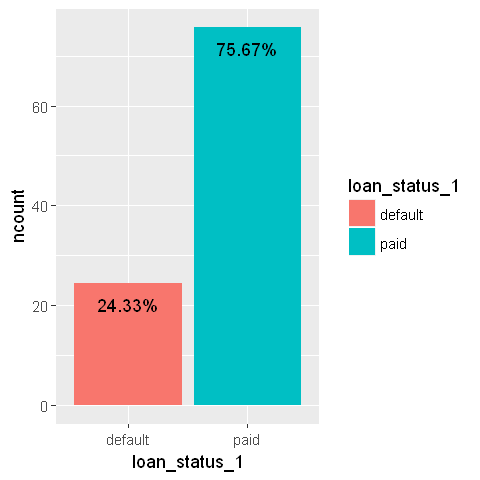

In [128]:
tmp = default_paid %>% group_by(loan_status_1) %>% summarise(ncount = n())
tmp$ncount = 100 * tmp$ncount/nrow(default_paid)
tmp$ncount_p = str_c(round(tmp$ncount,2),"%")
ggplot(tmp,aes(x=loan_status_1,y=ncount,fill=loan_status_1)) + geom_bar(stat="identity") +
    geom_text(aes(label=ncount_p),vjust = 2)

The data is moderately imbalance.

# Data Cleaning and Feature Engineering

In [129]:
table(default_paid$issue_d)


Apr-2008 Apr-2009 Apr-2010 Apr-2011 Apr-2012 Apr-2013 Apr-2014 Apr-2015 
     259      333      912     1416     3055     5767     7357     4541 
Aug-2007 Aug-2008 Aug-2009 Aug-2010 Aug-2011 Aug-2012 Aug-2013 Aug-2014 
      74      100      446     1175     1772     5092     6685     5848 
Aug-2015 Dec-2007 Dec-2008 Dec-2009 Dec-2010 Dec-2011 Dec-2012 Dec-2013 
    1996      172      253      658     1328     1995     5508     7055 
Dec-2014 Dec-2015 Feb-2008 Feb-2009 Feb-2010 Feb-2011 Feb-2012 Feb-2013 
    2174      612      306      302      682     1195     2417     4720 
Feb-2014 Feb-2015 Jan-2008 Jan-2009 Jan-2010 Jan-2011 Jan-2012 Jan-2013 
    6273     3887      305      269      662     1324     2443     5605 
Jan-2014 Jan-2015 Jul-2007 Jul-2008 Jul-2009 Jul-2010 Jul-2011 Jul-2012 
    6972     6896       63      141      411     1204     1723     4357 
Jul-2013 Jul-2014 Jul-2015 Jun-2007 Jun-2008 Jun-2009 Jun-2010 Jun-2011 
    6451     9605     3420       24      124      

In [130]:
library(zoo)

In [131]:
default_paid$issue_d_1 <- as.Date(as.yearmon(default_paid$issue_d, "%b-%Y"))

In [132]:
default_paid$issue_d_y <- as.numeric(format(default_paid$issue_d_1, "%Y"))

In [133]:
training = default_paid %>%filter(issue_d_y == 2015)

In [134]:
testing = default_paid %>%filter(issue_d_y != 2015)

In [135]:
table(training$loan_status)/dim(training)[1]


       Charged Off            Default         Fully Paid    In Grace Period 
        0.07904564         0.01103161         0.65516946         0.08856646 
 Late (16-30 days) Late (31-120 days) 
        0.03246772         0.13371911 

In [136]:
table(testing$loan_status)/dim(testing)[1]


       Charged Off            Default         Fully Paid    In Grace Period 
       0.178617610        0.003437179        0.771411102        0.012996831 
 Late (16-30 days) Late (31-120 days) 
       0.005031831        0.028505447 

### 1.addr_state

In [137]:
g1 = default_paid %>% filter(loan_status_1 == "default") %>% group_by(addr_state) %>% summarise(default_count = n())
g2 = default_paid %>% group_by(addr_state) %>% summarise(count = n())
g3 = g2 %>% left_join(g1) %>% mutate(default_rate = 100*default_count/count) %>% select(addr_state,count,default_count,default_rate)

Joining, by = "addr_state"


In [138]:
g3[order(-g3$default_rate),]

addr_state,count,default_count,default_rate
NE,61,24,39.344262
MS,539,201,37.291280
ND,12,4,33.333333
TN,2797,923,32.999642
IN,3138,961,30.624602
AL,3502,993,28.355226
NV,4192,1173,27.981870
OK,2389,665,27.835915
FL,19329,5148,26.633556
NY,23694,6289,26.542585


In [139]:
library(choroplethr)
library(choroplethrMaps)

In [140]:
state.default_rate.df = data.frame(region = g3$addr_state, value = g3$default_rate)

In [141]:
full.name = c()
for(i in 1:51)
{
    if(i==8){
        full.name <- append(full.name, "district of columbia")
    }else{
        full.name <- append(full.name, tolower(state.name[state.default_rate.df[i,1] == state.abb]))
    }
}

state.default_rate.df$region = full.name

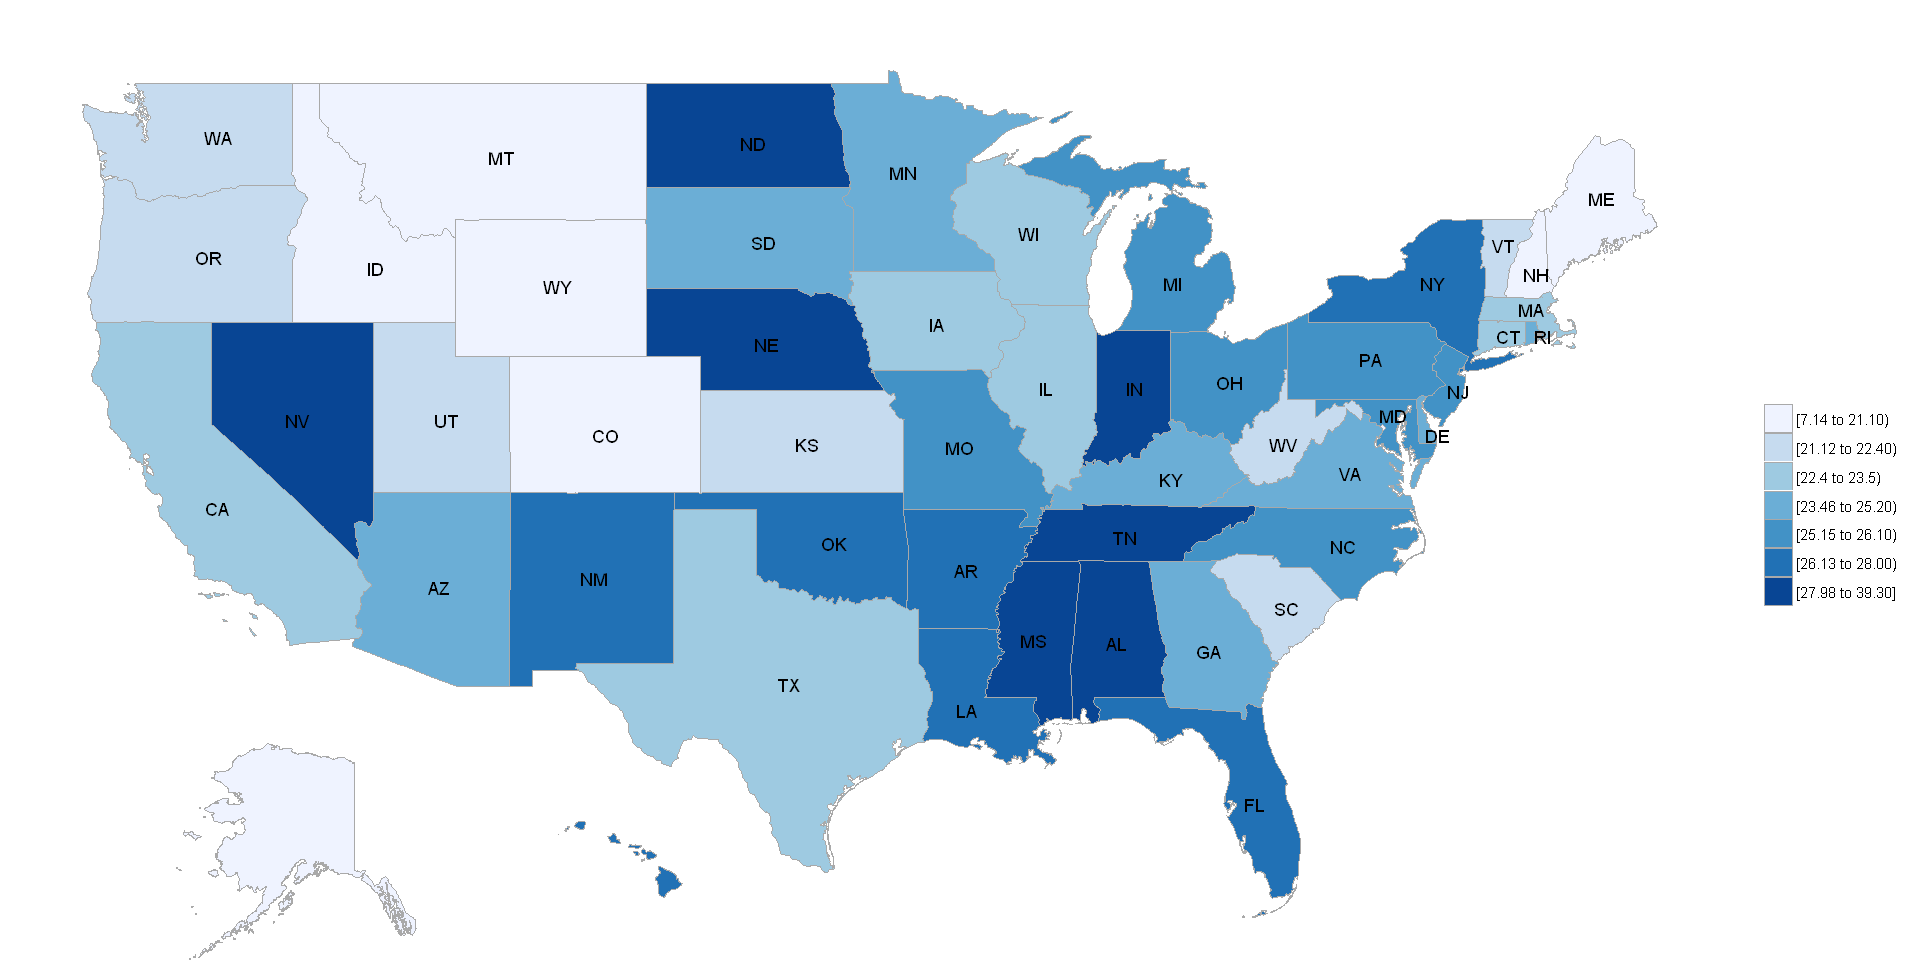

In [142]:
options(repr.plot.width=16, repr.plot.height=8)
state_choropleth(state.default_rate.df)

In [143]:
quantile(g3$default_rate)

0%       25%       50%       75%      100% 
 7.142857 22.135444 24.316547 26.175571 39.344262

In [144]:
#collapsing
default_paid$state_default <- 
  ifelse(default_paid$addr_state %in% g3$addr_state[which(g3$default_rate <= 24.41)],'low',
  ifelse(default_paid$addr_state %in% g3$addr_state[which(g3$default_rate <= 26.70)],'low_medium', 
  ifelse(default_paid$addr_state %in% g3$addr_state[which(g3$default_rate <= 28.57)],'medium_high','high')))

In [145]:
table(default_paid$state_default)


       high         low  low_medium medium_high 
       6547      142457      118053       10083 

In [146]:
summary(lm(loan_status_2 ~ state_default, default_paid))


Call:
lm(formula = loan_status_2 ~ state_default, data = default_paid)

Residuals:
   Min     1Q Median     3Q    Max 
     0      0      0      0      0 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                     0          0      NA       NA
state_defaultlow                0          0      NA       NA
state_defaultlow_medium         0          0      NA       NA
state_defaultmedium_high        0          0      NA       NA

Residual standard error: 0 on 277136 degrees of freedom
Multiple R-squared:    NaN,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 3 and 277136 DF,  p-value: NA


In [147]:
mylogit <- glm(loan_status_2 ~ state_default, data = default_paid, family = "binomial")

Warning message:
"glm.fit: algorithm did not converge"

In [148]:
summary(mylogit)


Call:
glm(formula = loan_status_2 ~ state_default, family = "binomial", 
    data = default_paid)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)
(Intercept)              -2.657e+01  4.401e+03  -0.006    0.995
state_defaultlow          1.928e-13  4.501e+03   0.000    1.000
state_defaultlow_medium  -5.634e-21  4.522e+03   0.000    1.000
state_defaultmedium_high -5.574e-21  5.652e+03   0.000    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 277139  degrees of freedom
Residual deviance: 1.6079e-06  on 277136  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


### 2.emp_length

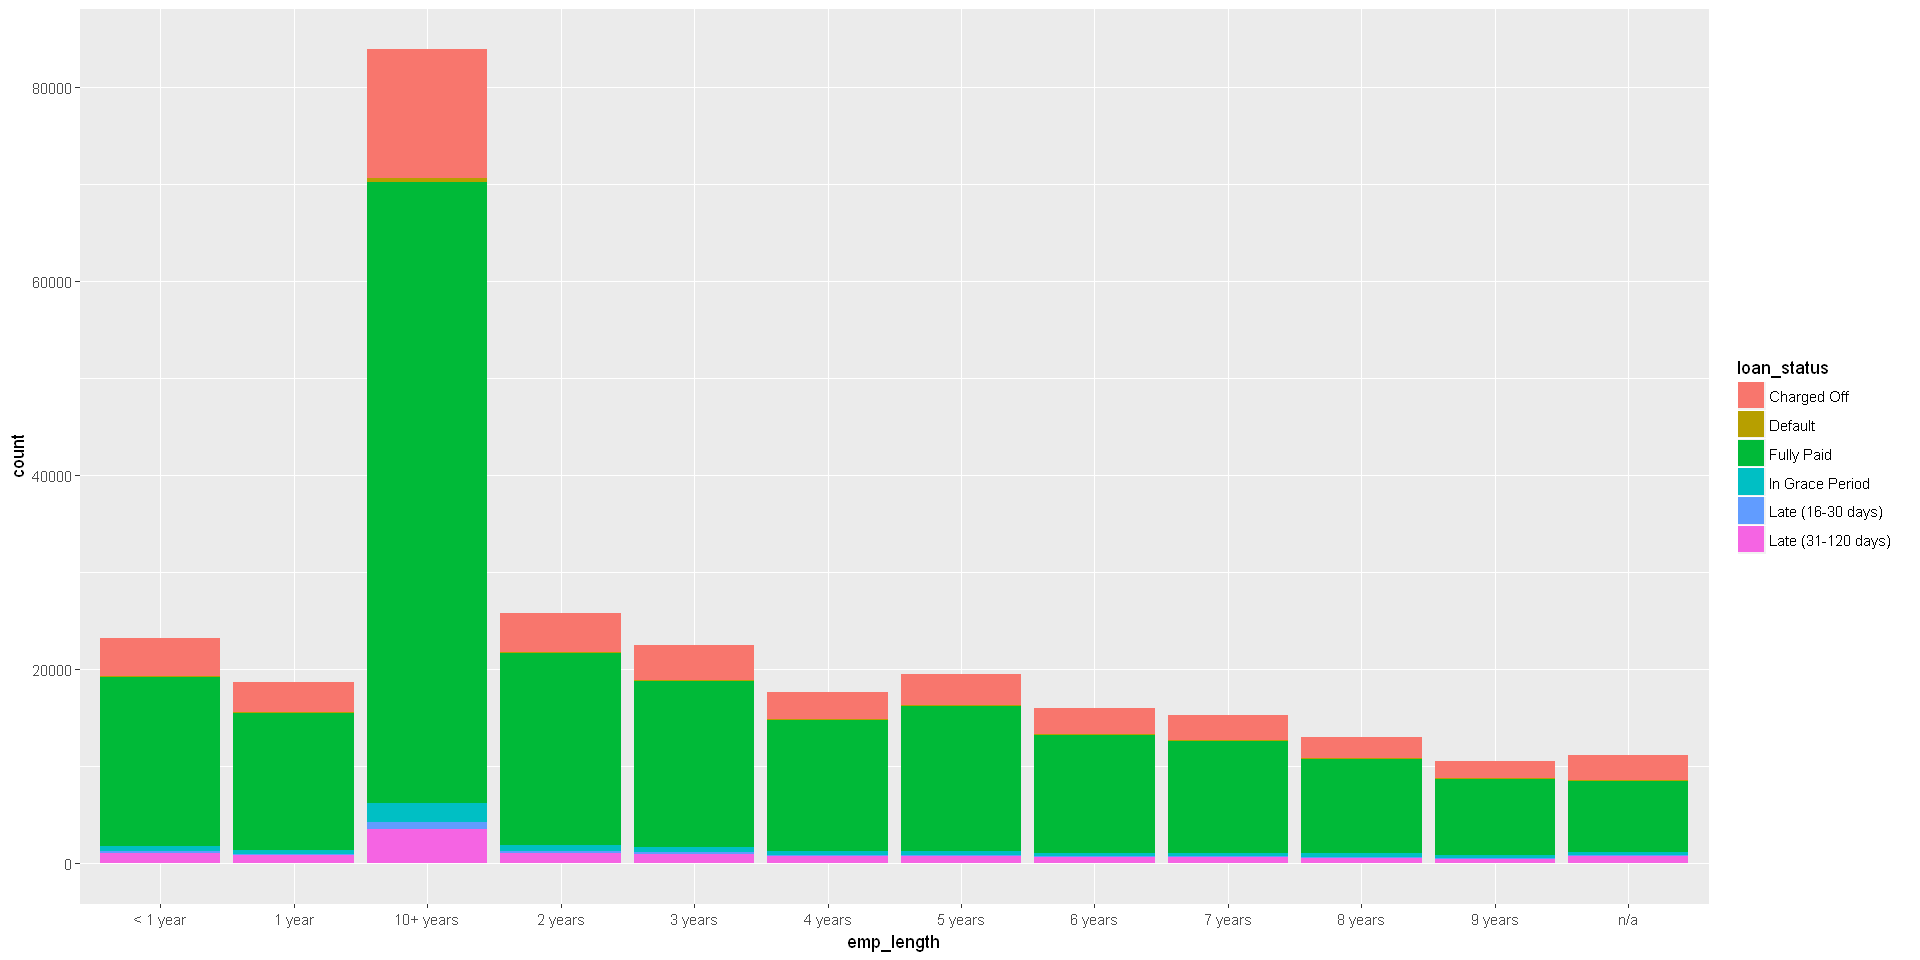

In [149]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = emp_length, fill = loan_status))

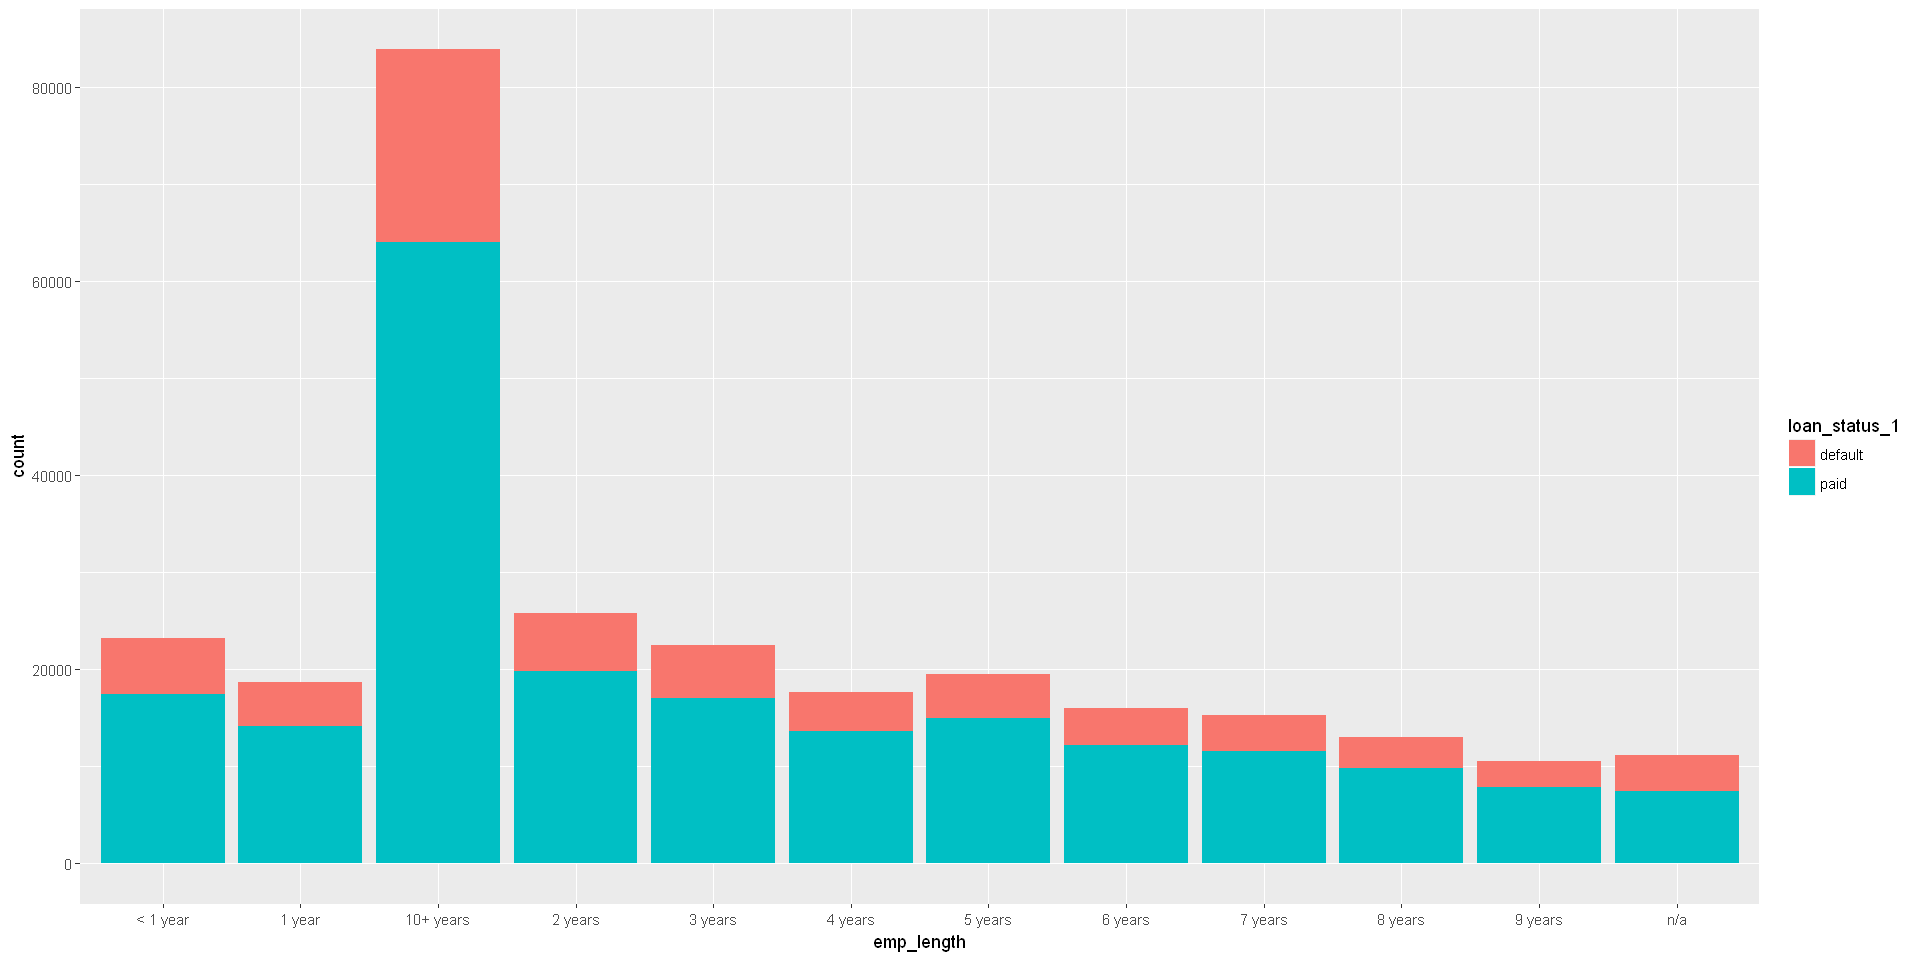

In [150]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = emp_length, fill = loan_status_1))

In [151]:
emp1 = default_paid %>% filter(loan_status_1 == "default") %>% group_by(emp_length) %>% summarise(default_count = n())
emp2 = default_paid %>% group_by(emp_length) %>% summarise(count = n())
emp3 = emp2 %>% left_join(emp1) %>% mutate(default_rate = 100*default_count/count) %>% select(emp_length,count,default_count,default_rate)

Joining, by = "emp_length"


In [152]:
emp3[with(emp3, order(-default_rate)), ]

emp_length,count,default_count,default_rate
n/a,11101,3710,33.42041
9 years,10518,2667,25.35653
< 1 year,23210,5815,25.05386
8 years,13028,3258,25.00768
7 years,15281,3730,24.40940
1 year,18643,4494,24.10556
3 years,22436,5396,24.05063
6 years,15999,3840,24.00150
10+ years,83918,19856,23.66119
2 years,25828,6034,23.36224


In [278]:
#check independence between employ length and default

In [153]:
with(default_paid, chisq.test(emp_length, loan_status_1))


	Pearson's Chi-squared test

data:  emp_length and loan_status_1
X-squared = 575.51, df = 11, p-value < 2.2e-16


### 3.home_ownership

In [154]:
table(default_paid$home_ownership)


     ANY MORTGAGE     NONE    OTHER      OWN     RENT 
       1   135573       48      179    24391   116948 

In [155]:
default_paid$home_ownership = ifelse(default_paid$home_ownership %in% c('ANY','NONE','OTHER'),'OTHER',default_paid$home_ownership)

In [156]:
table(default_paid$home_ownership)


MORTGAGE    OTHER      OWN     RENT 
  135573      228    24391   116948 

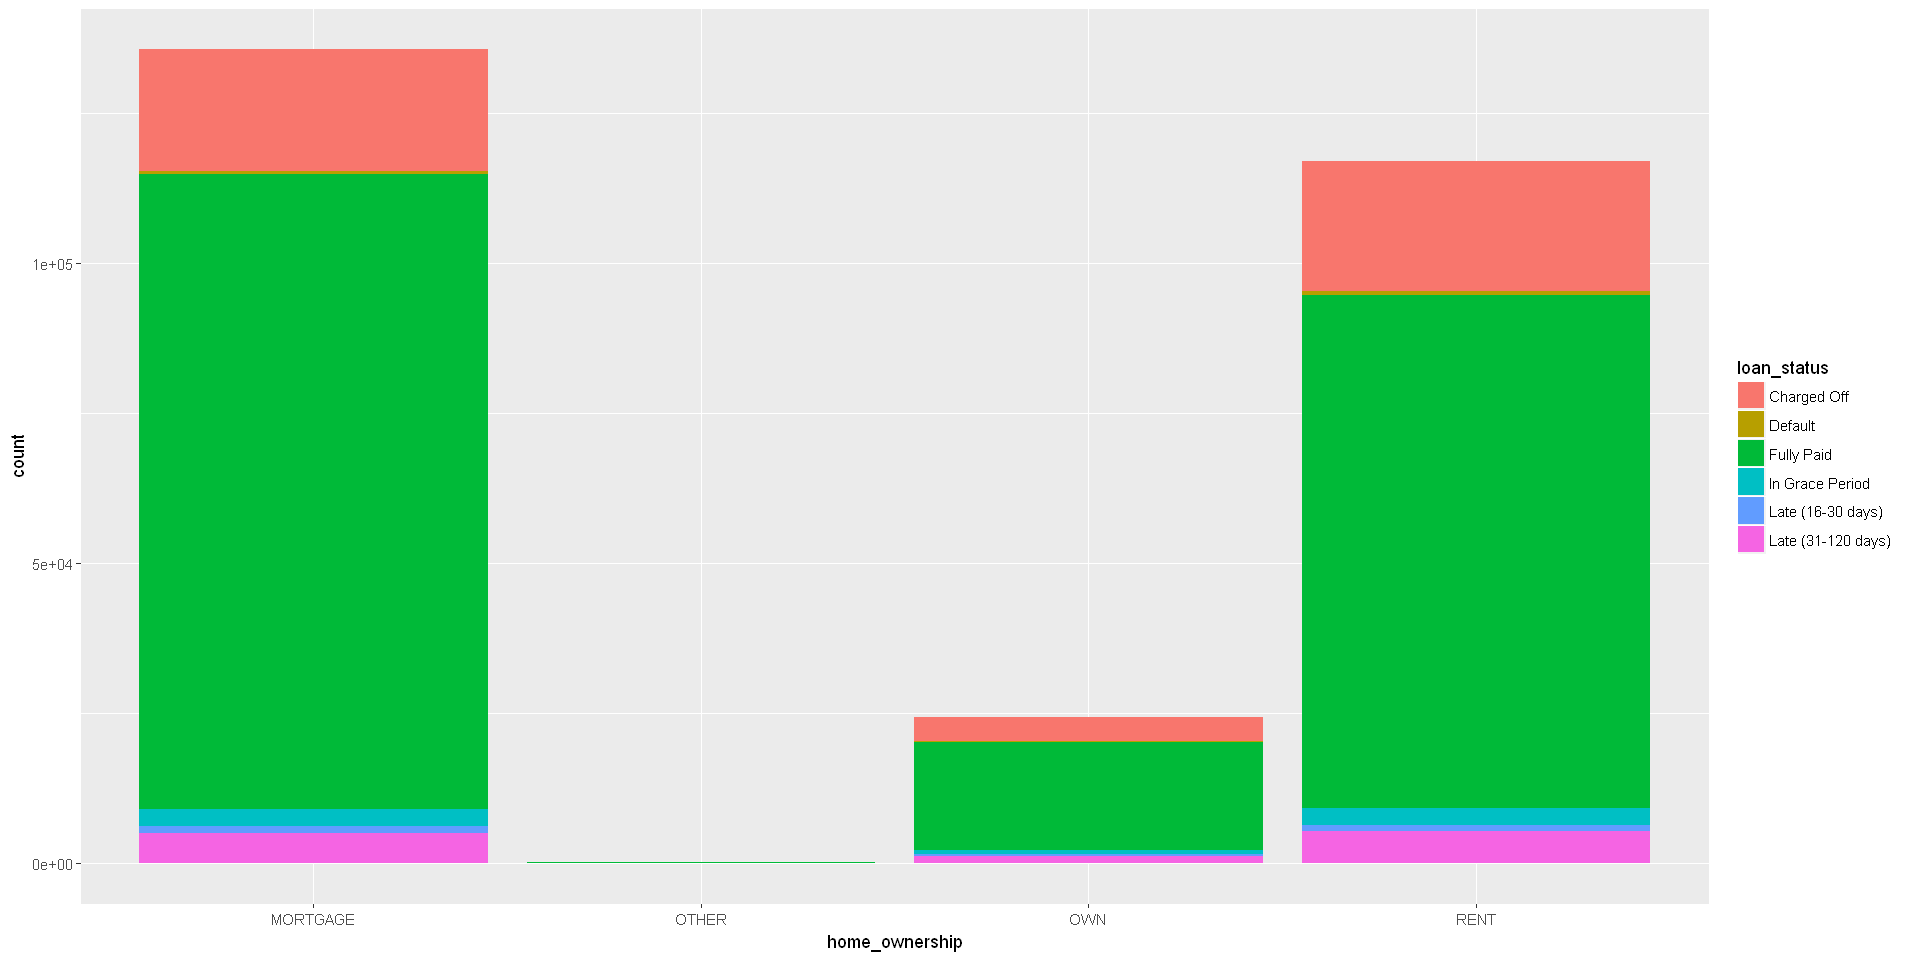

In [157]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = home_ownership, fill = loan_status))

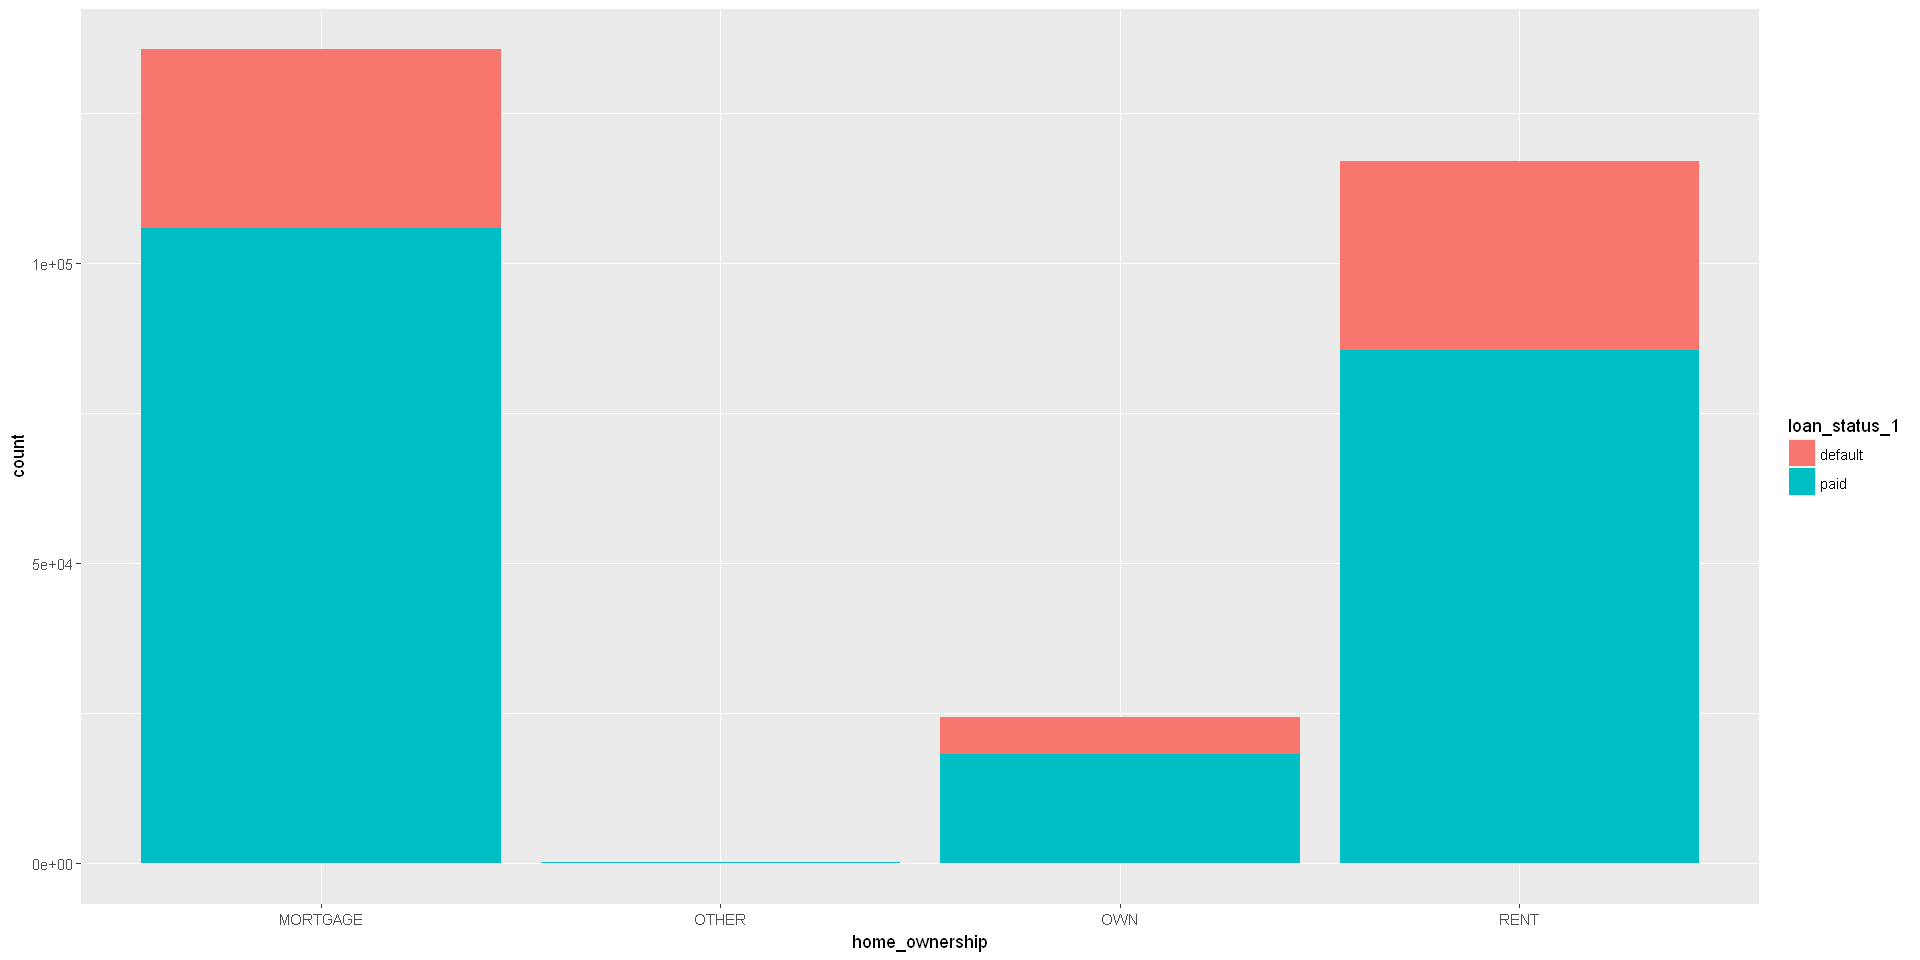

In [158]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = home_ownership, fill = loan_status_1))

In [159]:
own1 = default_paid %>% filter(loan_status_1 == "default") %>% group_by(home_ownership) %>% summarise(default_count = n())
own2 = default_paid %>% group_by(home_ownership) %>% summarise(count = n())
own3 = own2 %>% left_join(own1) %>% mutate(default_rate = 100*default_count/count) %>% select(home_ownership,count,default_count,default_rate)

Joining, by = "home_ownership"


In [160]:
own3

home_ownership,count,default_count,default_rate
MORTGAGE,135573,29699,21.90628
OTHER,228,46,20.17544
OWN,24391,6293,25.80050
RENT,116948,31391,26.84184


### 4.member_id

drop member_id

In [161]:
default_paid$member_id = NULL

### 5.zip_code

too many levels--> drop

In [162]:
default_paid$zip_code = NULL

### 6.annual_inc

In [163]:
sum(is.na(default_paid$annual_inc))

[1] 4

In [164]:
#impute missing value using meadian
default_paid$annual_inc[is.na(default_paid$annual_inc)] = median(default_paid$annual_inc,na.rm = T)

In [165]:
sum(is.na(default_paid$annual_inc))

[1] 0

In [166]:
quantile(default_paid$annual_inc)

0%     25%     50%     75%    100% 
   1896   45000   62000   87000 8900060

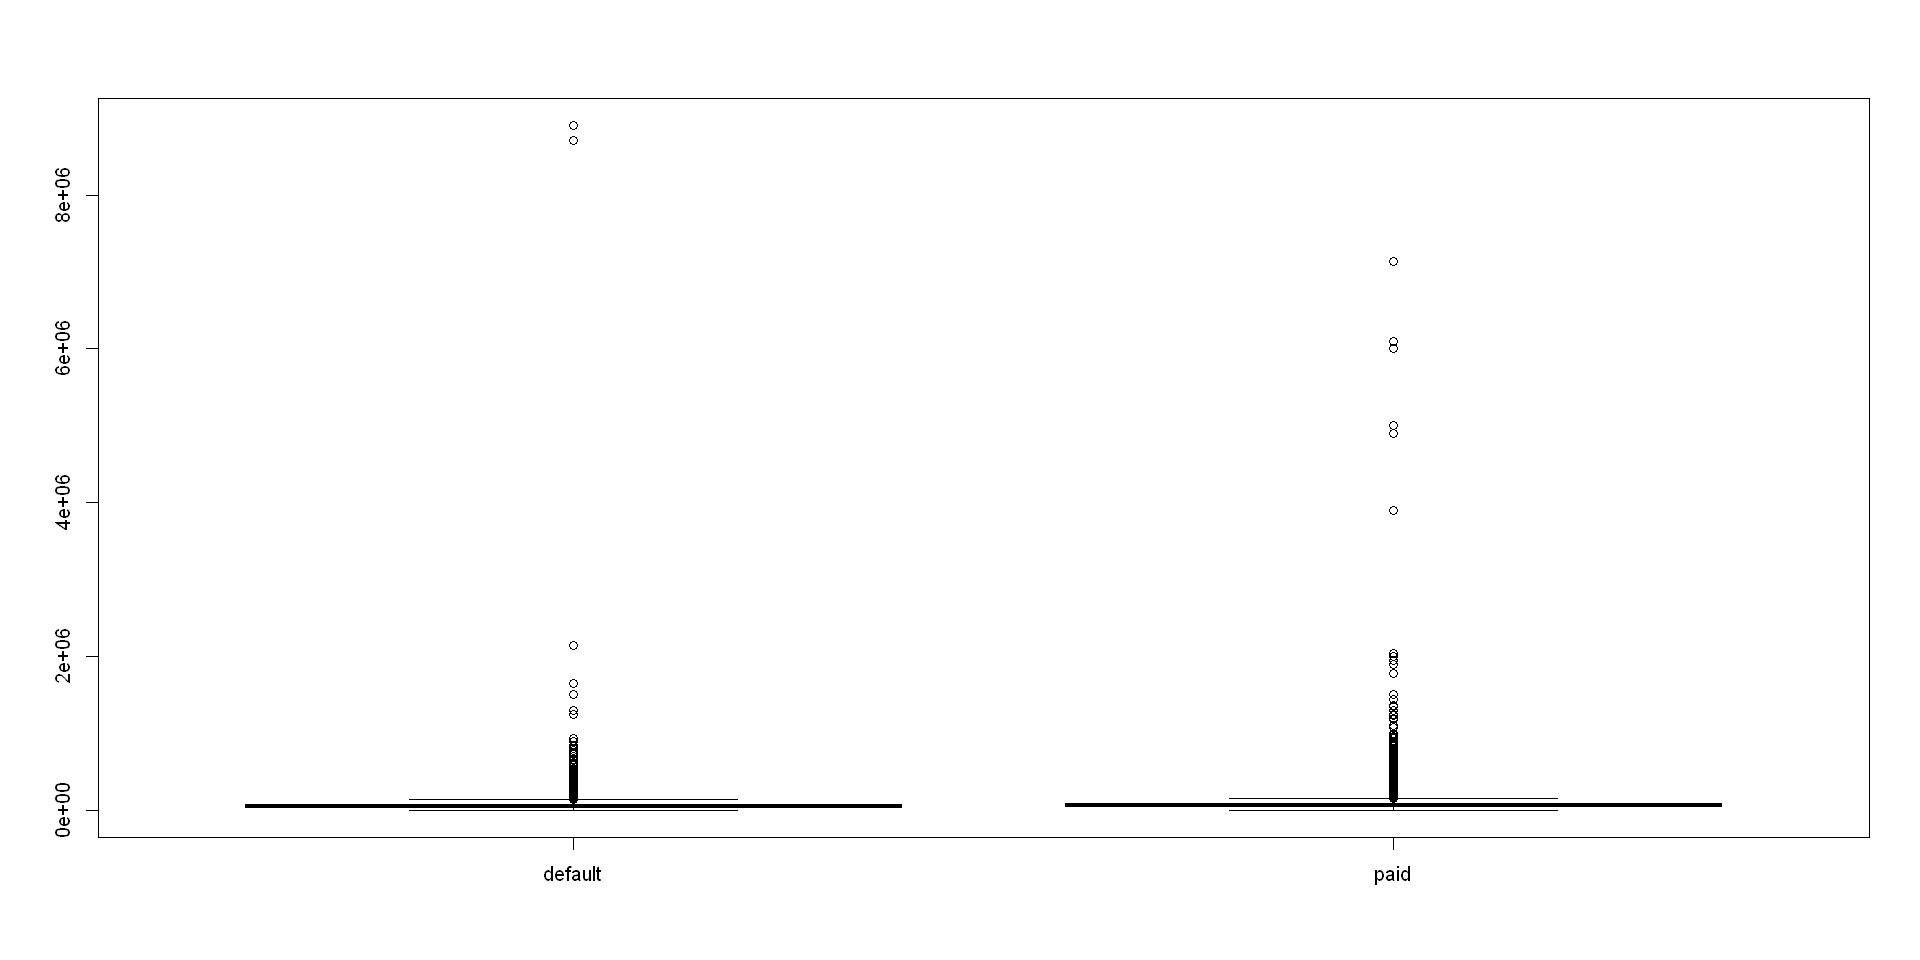

In [167]:
boxplot(default_paid$annual_inc~default_paid$loan_status_1)

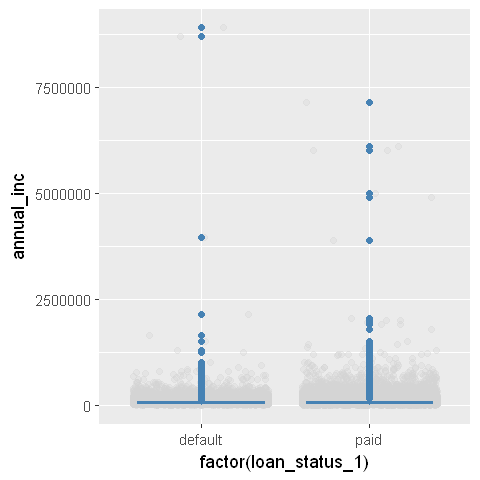

In [101]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(default_paid, aes(x=factor(loan_status_1), y=annual_inc)) + 
geom_jitter(alpha=0.3, color='lightgrey') +
geom_boxplot(color='steelblue') 

In [168]:
#test: is there significant difference mean between paid and default group

In [169]:
t.test(annual_inc ~ loan_status_1, data = default_paid)


	Welch Two Sample t-test

data:  annual_inc by loan_status_1
t = -24.255, df = 106010, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7368.714 -6266.839
sample estimates:
mean in group default    mean in group paid 
             67324.67              74142.45 


### dti

In [170]:
quantile(default_paid$dti)

0%   25%   50%   75%  100% 
 0.00 10.90 16.42 22.27 59.26

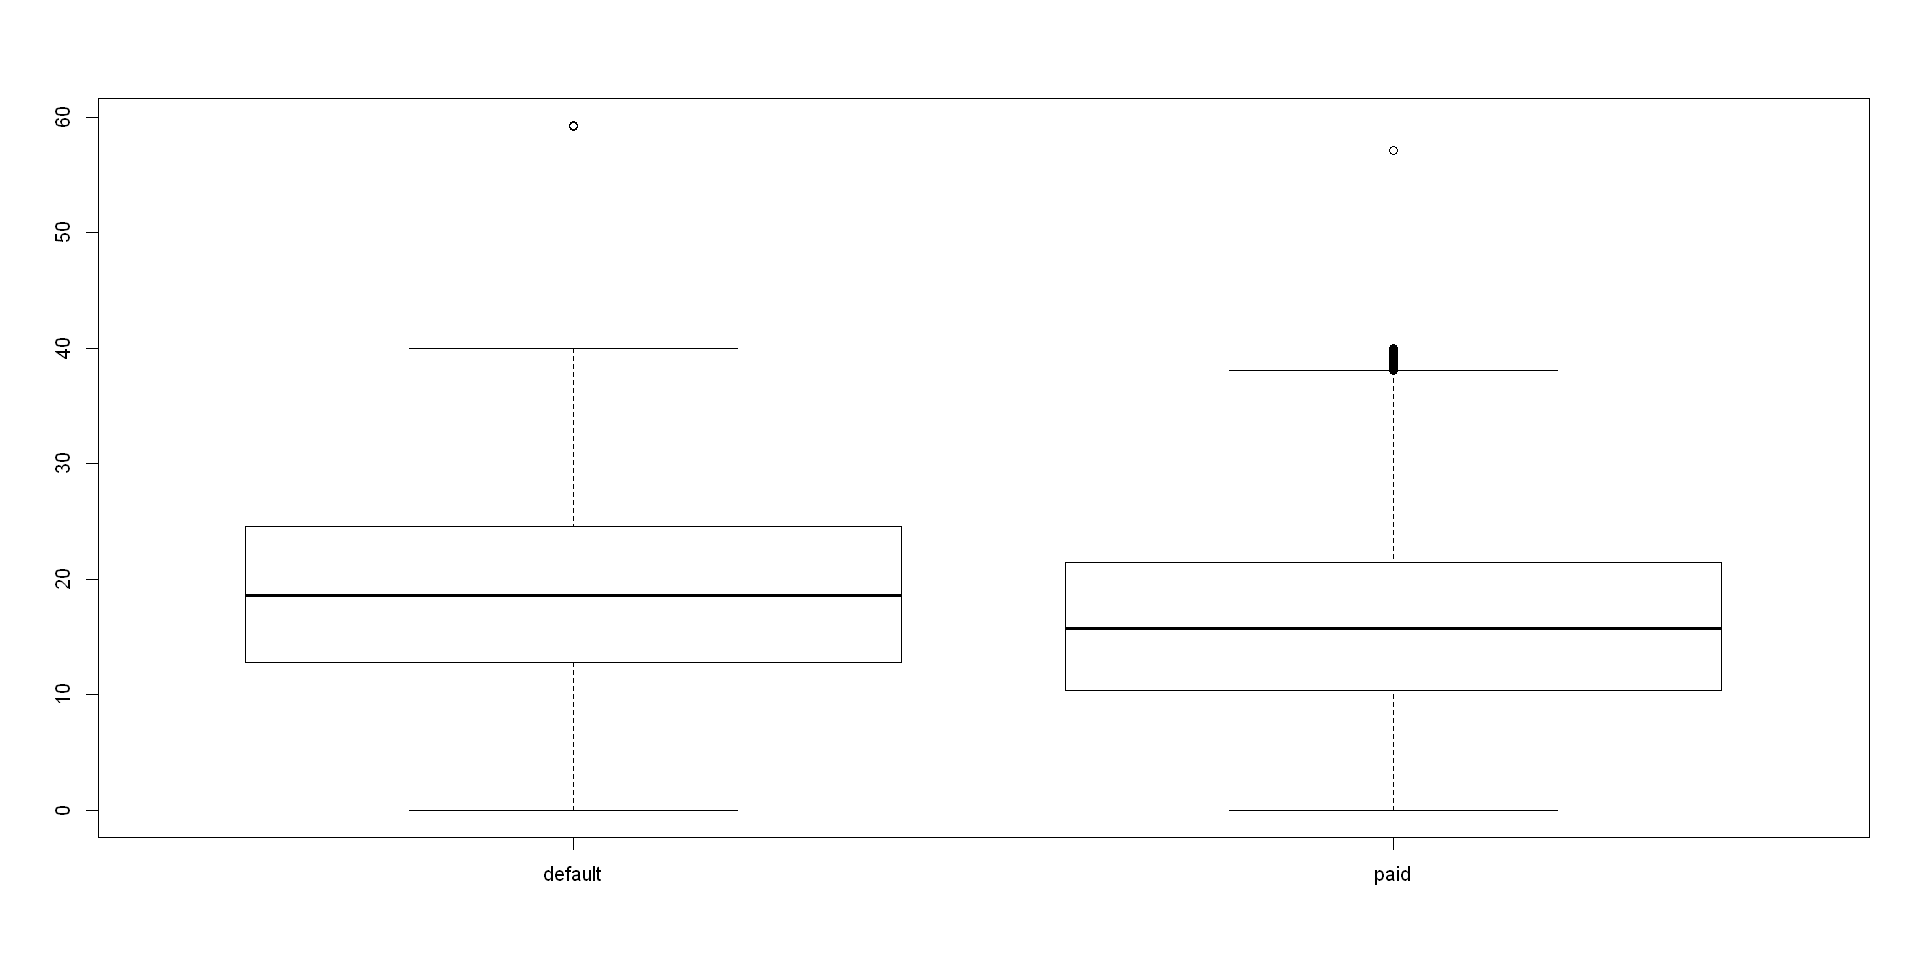

In [171]:
boxplot(default_paid$dti~default_paid$loan_status_1)

### earliest_cr_line

Transform earliest _cr_line into year

In [105]:
head(default_paid$earliest_cr_line)

[1] "Jan-1985" "Apr-1999" "Nov-2001" "Feb-1996" "Nov-2004" "Jan-2007"

In [172]:
default_paid$earliest_cr_line <- as.Date(as.yearmon(default_paid$earliest_cr_line, "%b-%Y"))

In [173]:
head(default_paid$earliest_cr_line)

[1] "1985-01-01" "1999-04-01" "2001-11-01" "1996-02-01" "2004-11-01"
[6] "2007-01-01"

In [174]:
default_paid$earliest_cr_line_y <- as.numeric(format(default_paid$earliest_cr_line, "%Y"))

In [175]:
head(default_paid$earliest_cr_line_y)

[1] 1985 1999 2001 1996 2004 2007

In [176]:
table(default_paid$loan_status,default_paid$earliest_cr_line_y)

                    
                      1946  1948  1950  1954  1955  1956  1957  1958  1959
  Charged Off            0     0     0     0     2     3     0     1     3
  Default                0     0     0     0     0     0     0     1     0
  Fully Paid             1     1     2     5     2     3     2     4     6
  In Grace Period        0     0     0     0     0     1     0     0     0
  Late (16-30 days)      0     0     0     0     0     0     0     0     0
  Late (31-120 days)     0     0     0     0     0     0     0     0     2
                    
                      1960  1961  1962  1963  1964  1965  1966  1967  1968
  Charged Off            4     2     7     9    13    17    18    38    19
  Default                0     0     0     0     1     0     0     1     1
  Fully Paid            13     9    22    33    25    37    54    81   101
  In Grace Period        0     1     0     2     2     2     2     3     2
  Late (16-30 days)      0     0     0     1     3     2  

Warning message:
"Removed 29 rows containing non-finite values (stat_count)."

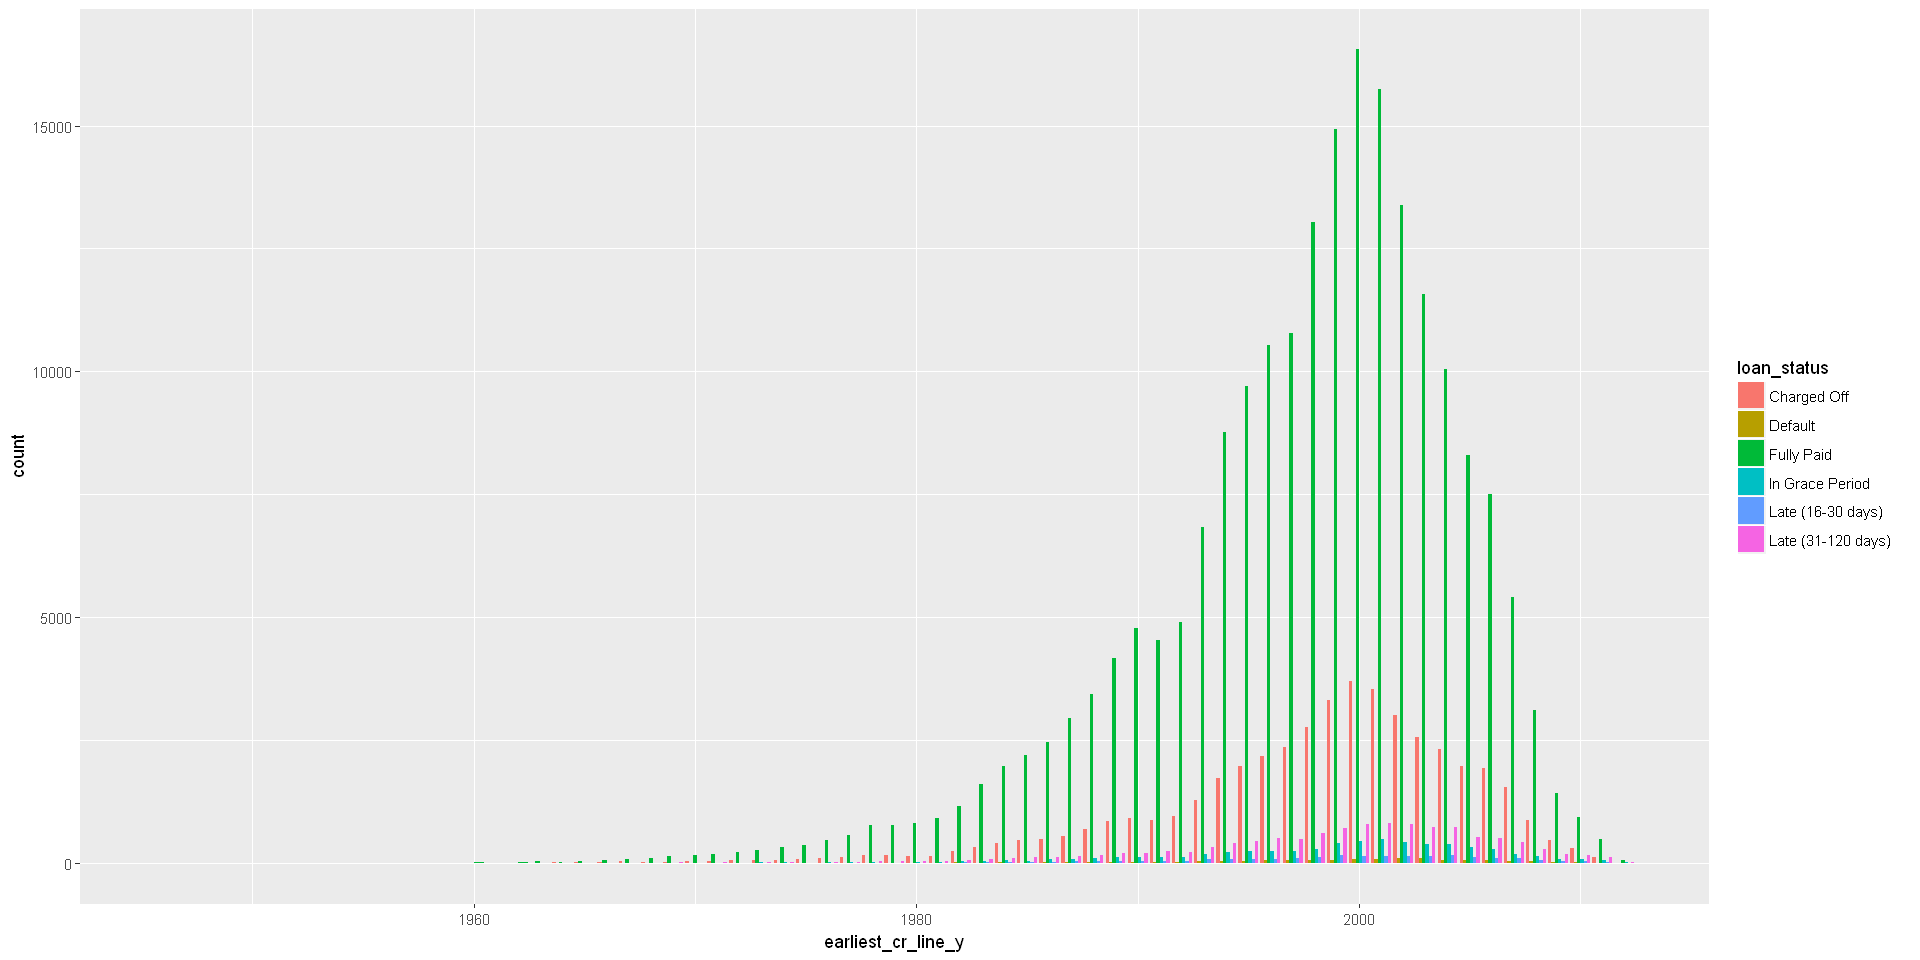

In [179]:
ggplot(data = default_paid) + geom_bar( mapping = aes(x = earliest_cr_line_y, fill = loan_status),position = "dodge")

Warning message:
"Removed 29 rows containing non-finite values (stat_count)."

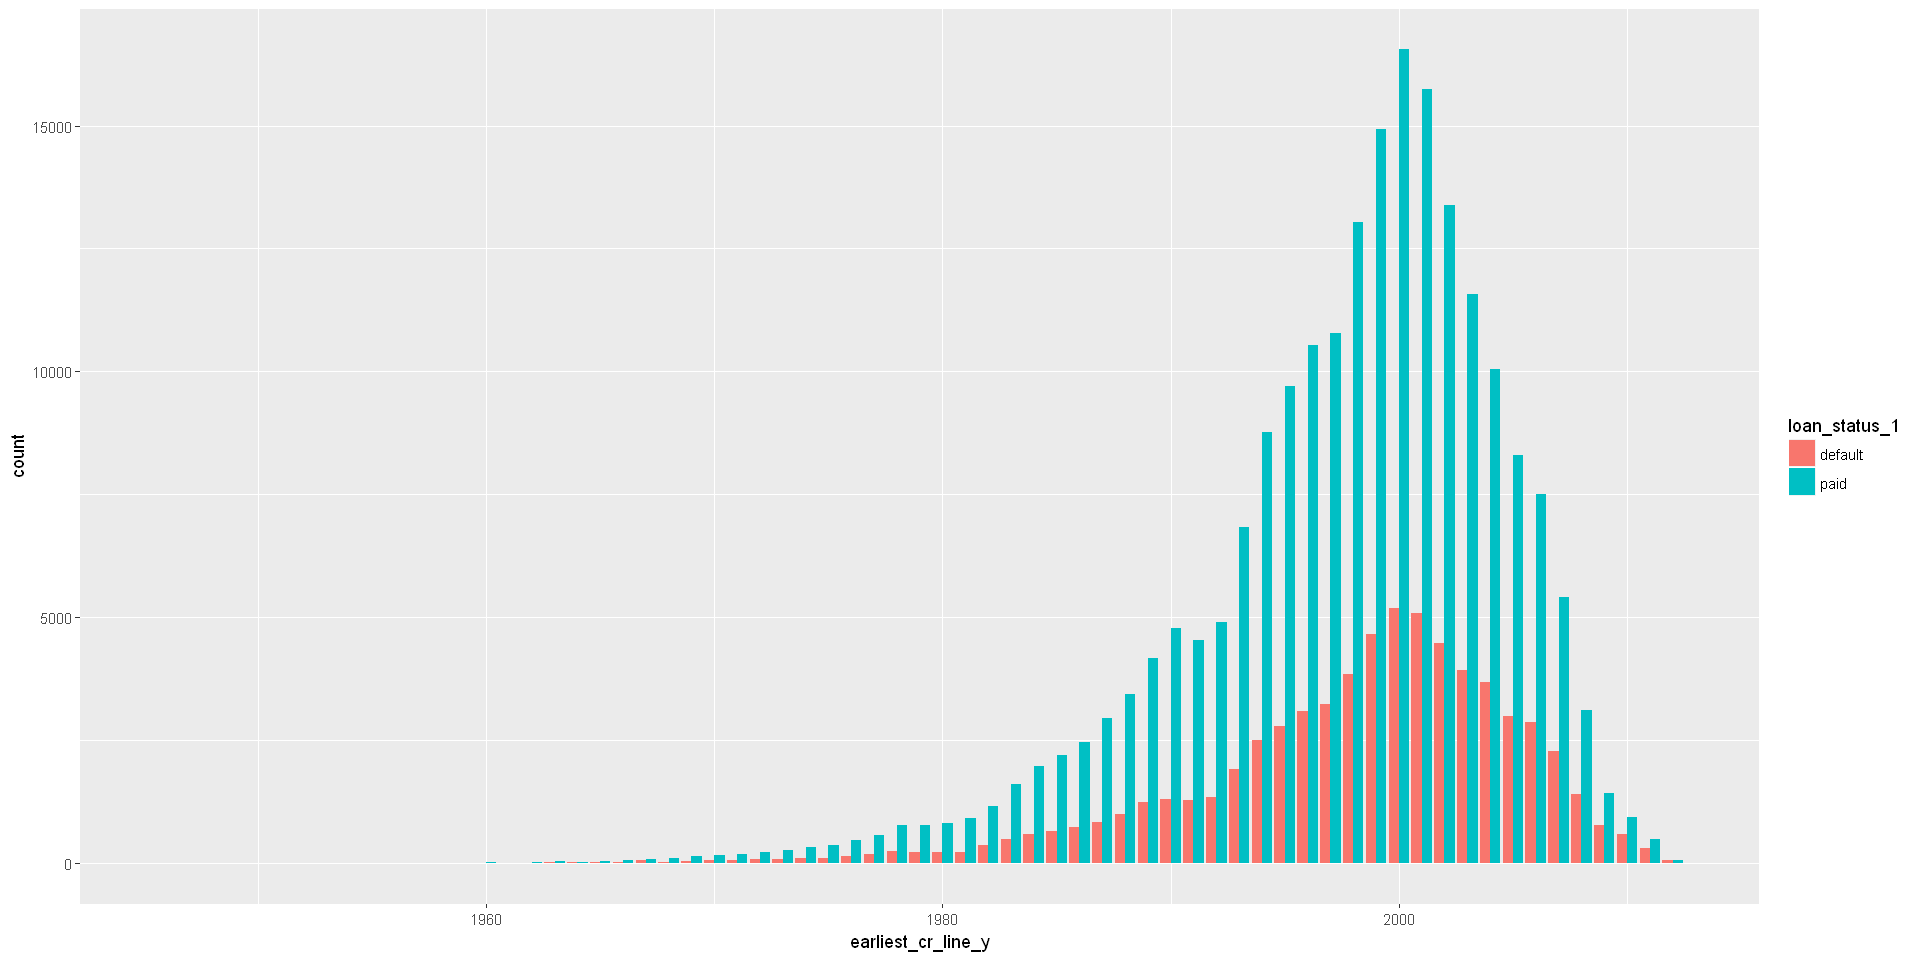

In [180]:
ggplot(data = default_paid) + geom_bar( mapping = aes(x = earliest_cr_line_y, fill = loan_status_1),position = "dodge")

### fico_range_high, fico_range_low,last_fico_range_high, last_fico_range_low

In [189]:
head(loanT$last_fico_range_low)

NULL

In [190]:
# All are null in the original dataset. Ignore these four column

### inq_last_6mths

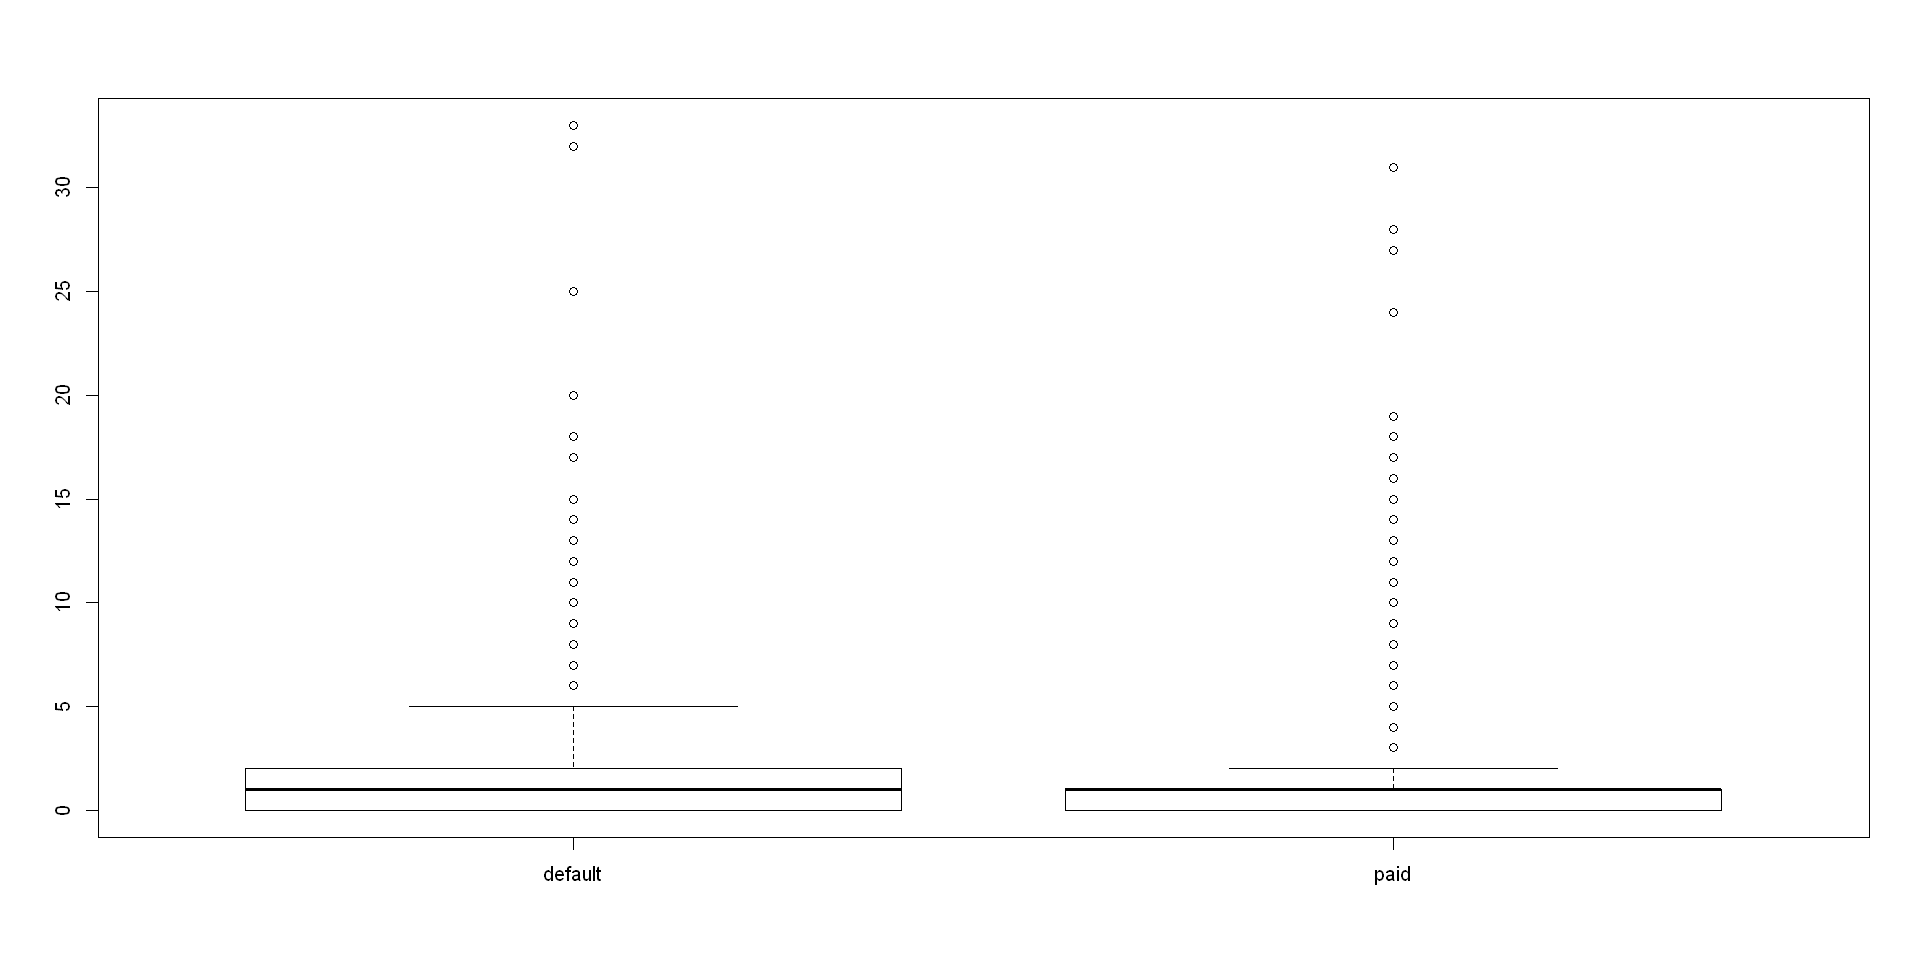

In [193]:
boxplot(default_paid$inq_last_6mths~default_paid$loan_status_1)

In [209]:
sum(is.na(default_paid$inq_last_6mths))

[1] 29

In [210]:
#Impute missing value using median
default_paid$inq_last_6mths[is.na(default_paid$inq_last_6mths)]

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA

### last_credit_pull_d

In [196]:
#The most recent month LC pulled credit for this loan

In [195]:
head(default_paid$last_credit_pull_d)

[1] "Jan-2016" "Sep-2013" "Jan-2016" "Jan-2015" "Sep-2015" "Dec-2014"

In [199]:
#useless--> drop

In [200]:
default_paid$last_credit_pull_d = NULL

### total_acc

In [198]:
head(default_paid$total_acc)

[1]  9  4 10 37 12  4

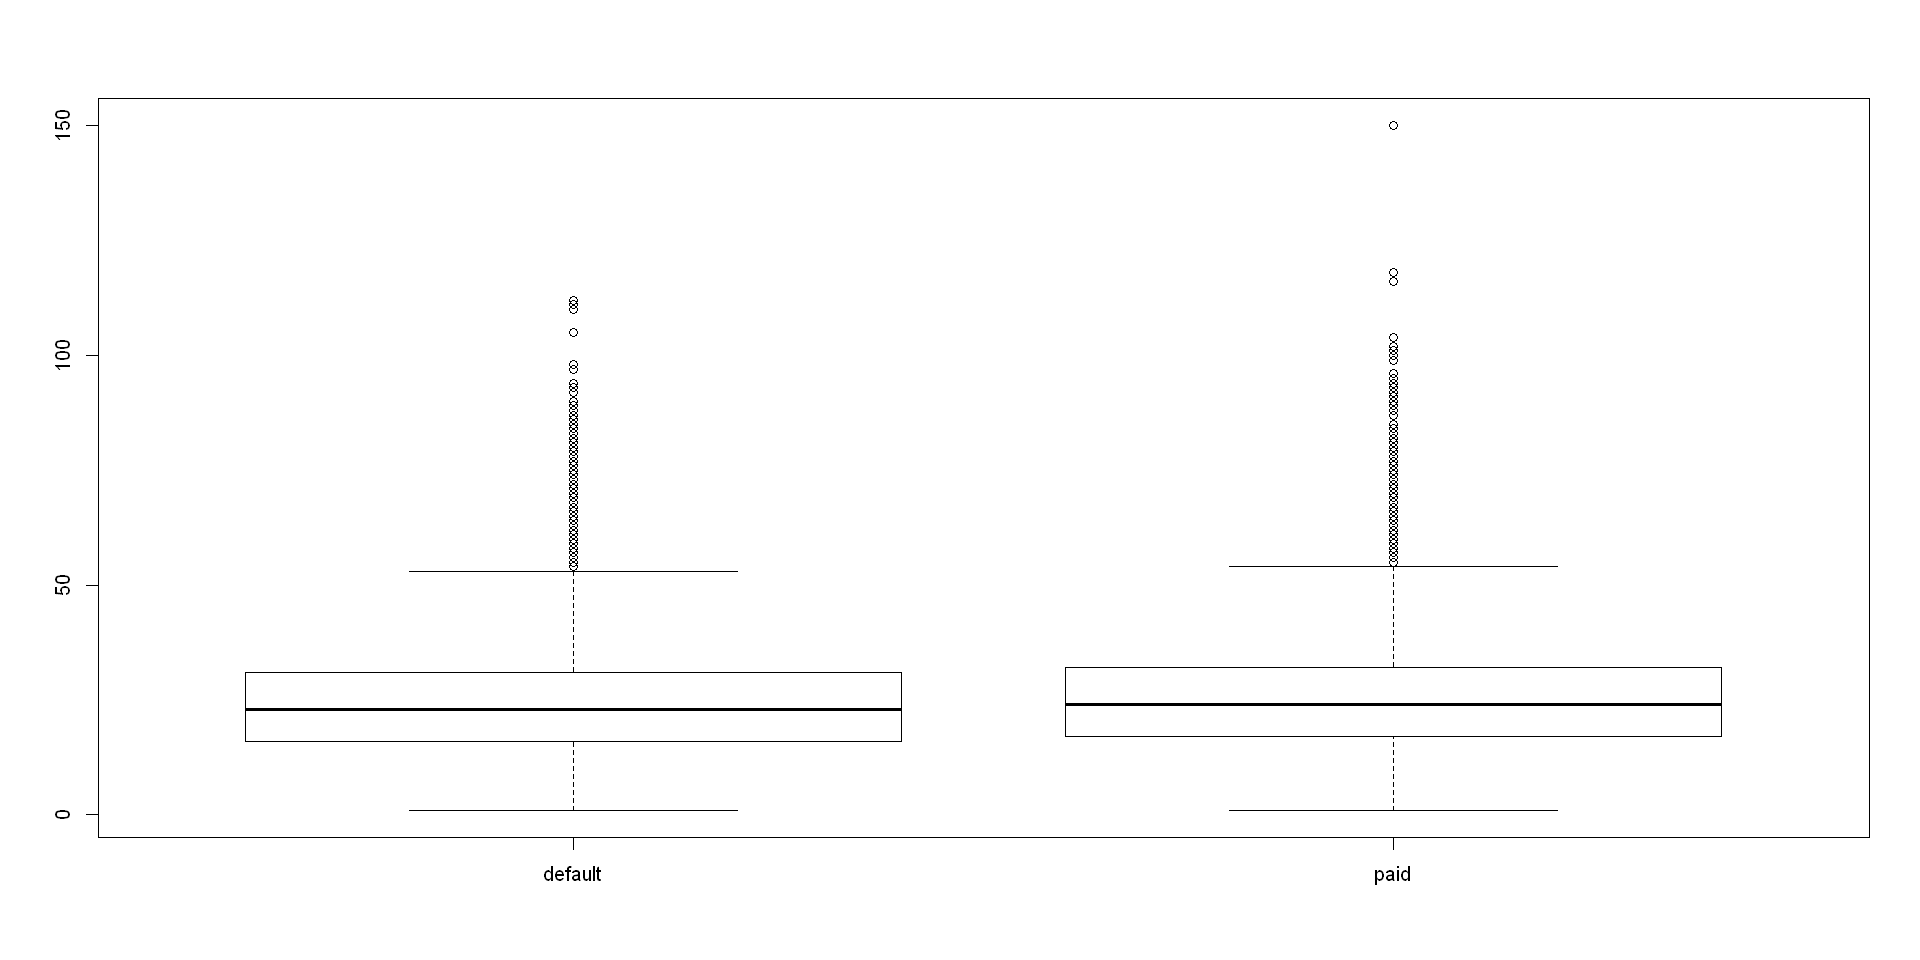

In [201]:
boxplot(default_paid$total_acc~default_paid$loan_status_1)

In [202]:
t.test(total_acc ~ loan_status_1, data = default_paid)


	Welch Two Sample t-test

data:  total_acc by loan_status_1
t = -12.867, df = 114480, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7725212 -0.5682874
sample estimates:
mean in group default    mean in group paid 
             24.52495              25.19535 


Warning message:
"Removed 29 rows containing non-finite values (stat_count)."

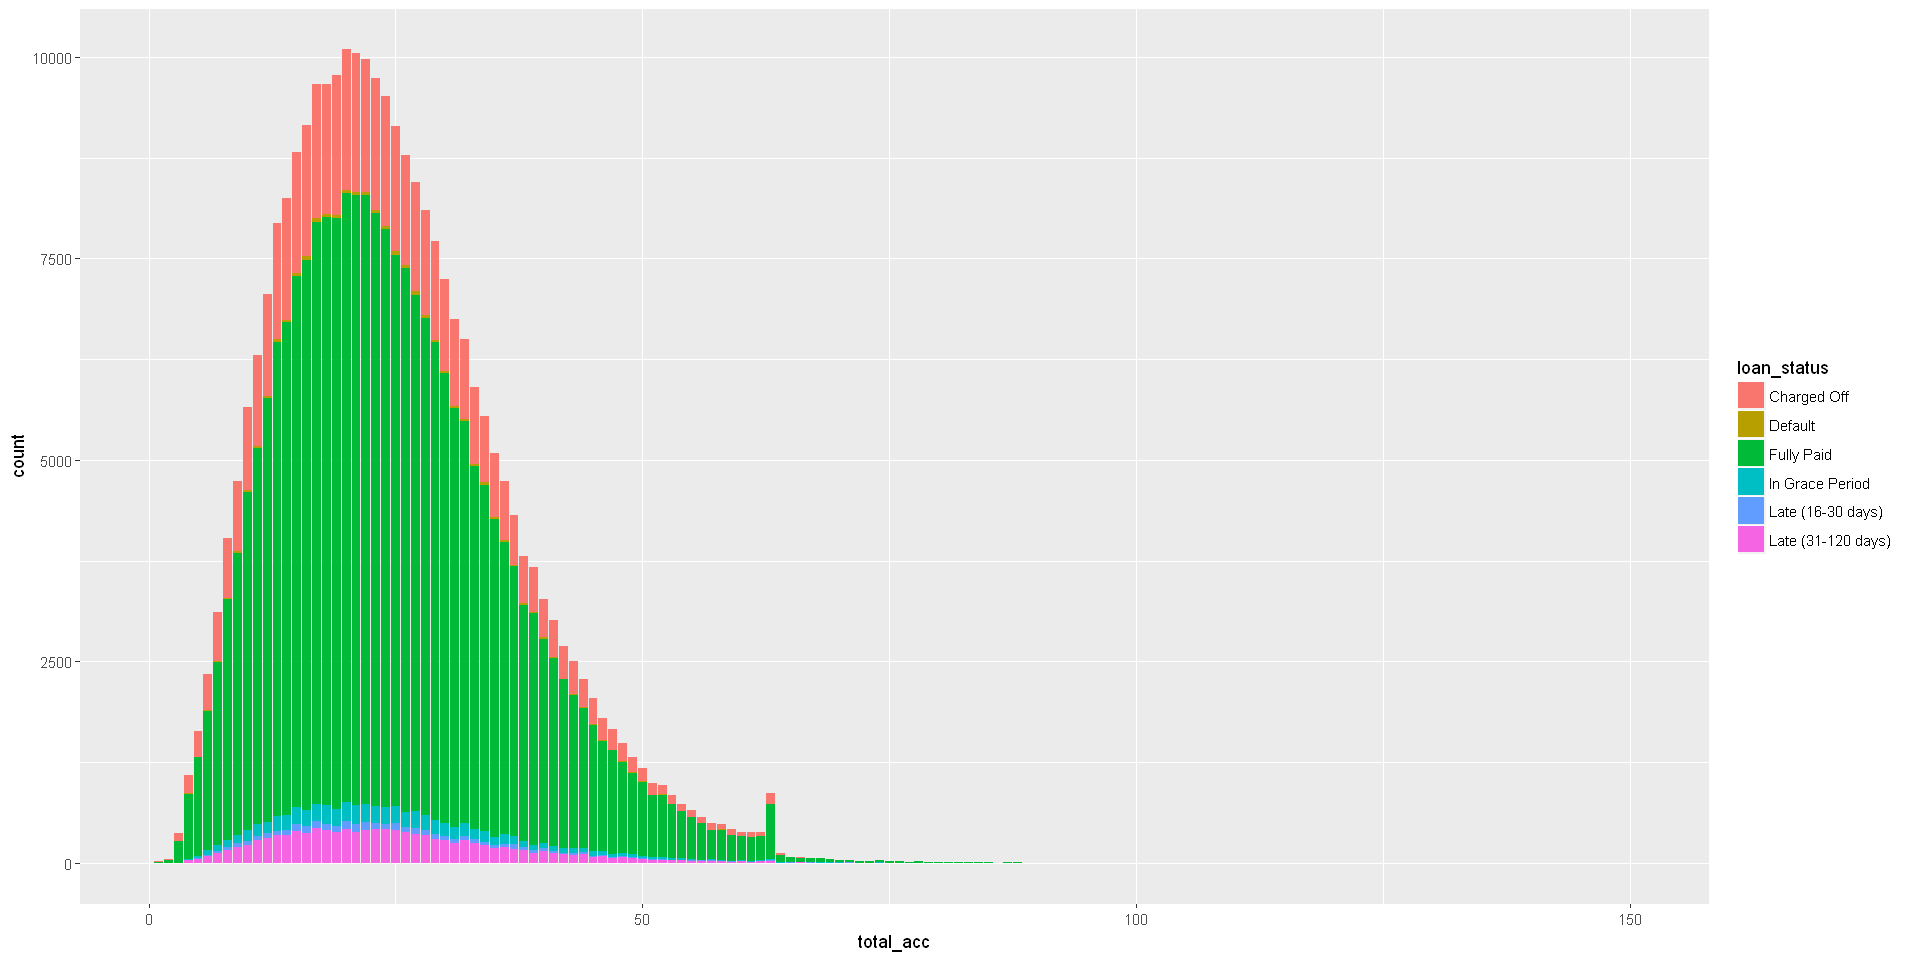

In [203]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = total_acc, fill = loan_status))

Warning message:
"Removed 29 rows containing non-finite values (stat_count)."

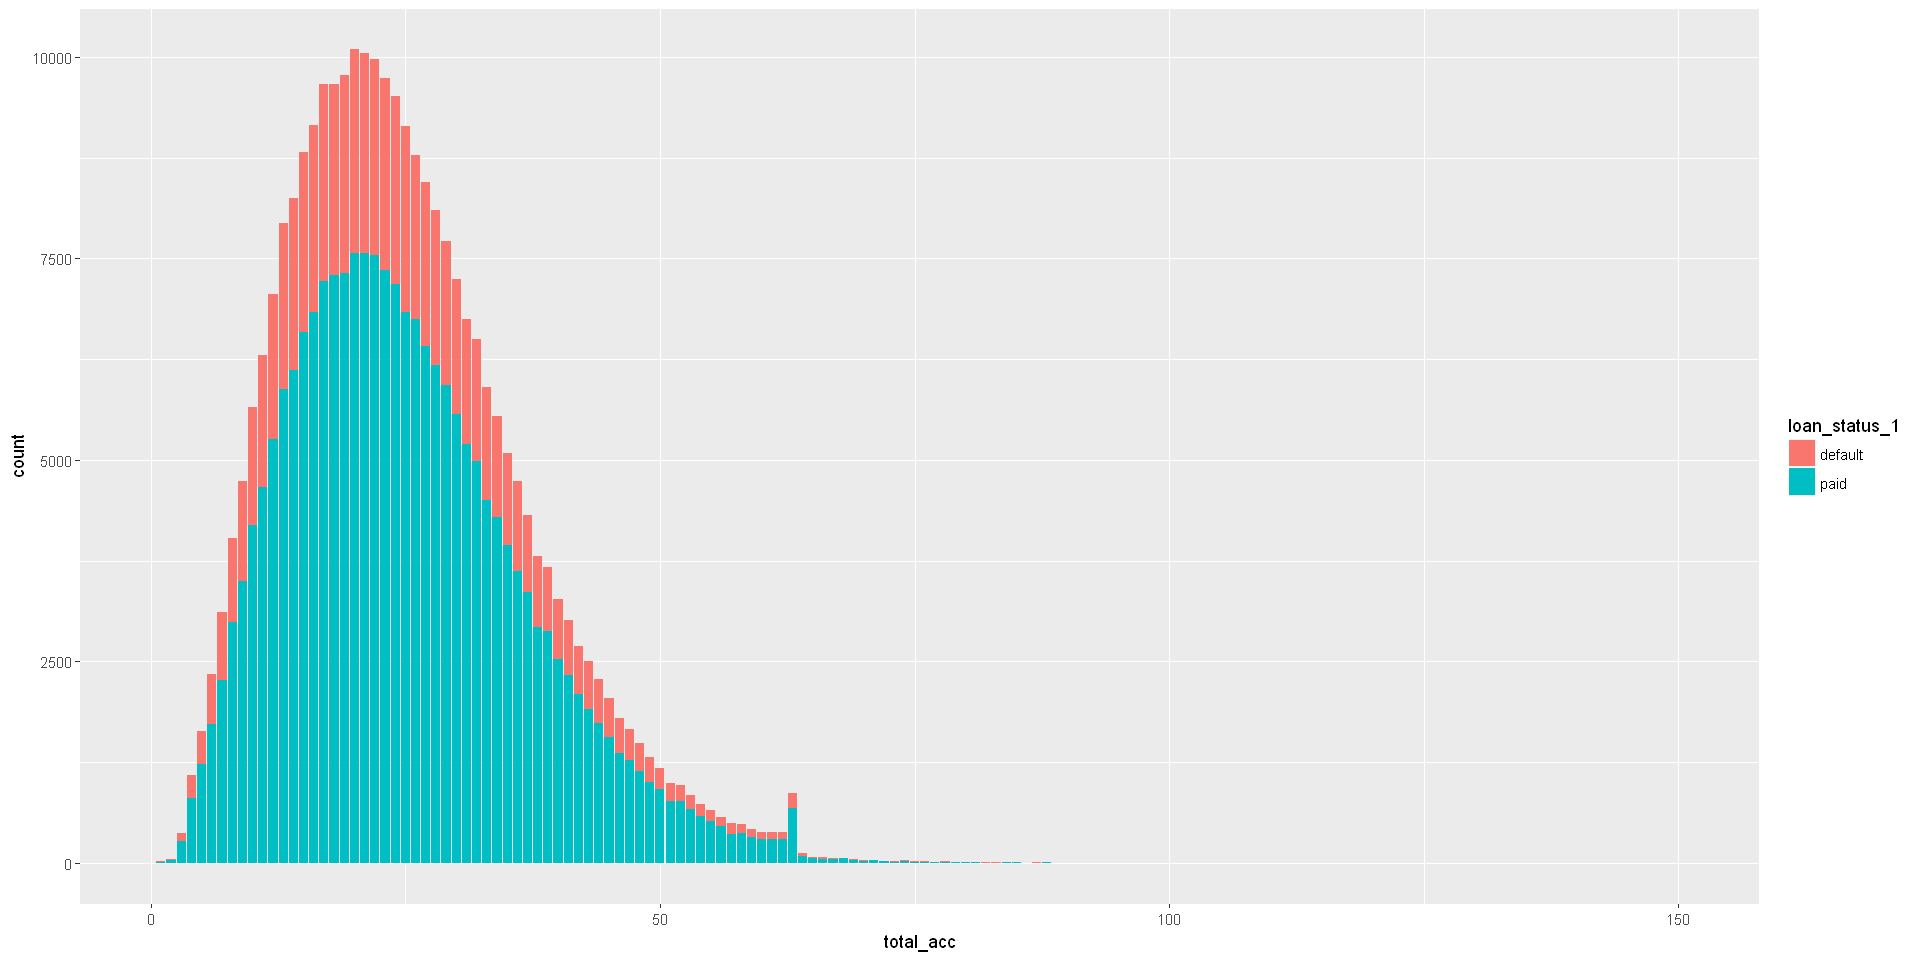

In [204]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = total_acc, fill = loan_status_1))

In [214]:
sum(is.na(default_paid$total_acc))

[1] 29

In [217]:
#impute the missing value using median
default_paid$total_acc[is.na(default_paid$total_acc)] = median(default_paid$total_acc,na.rm = T)

### tot_cur_bal

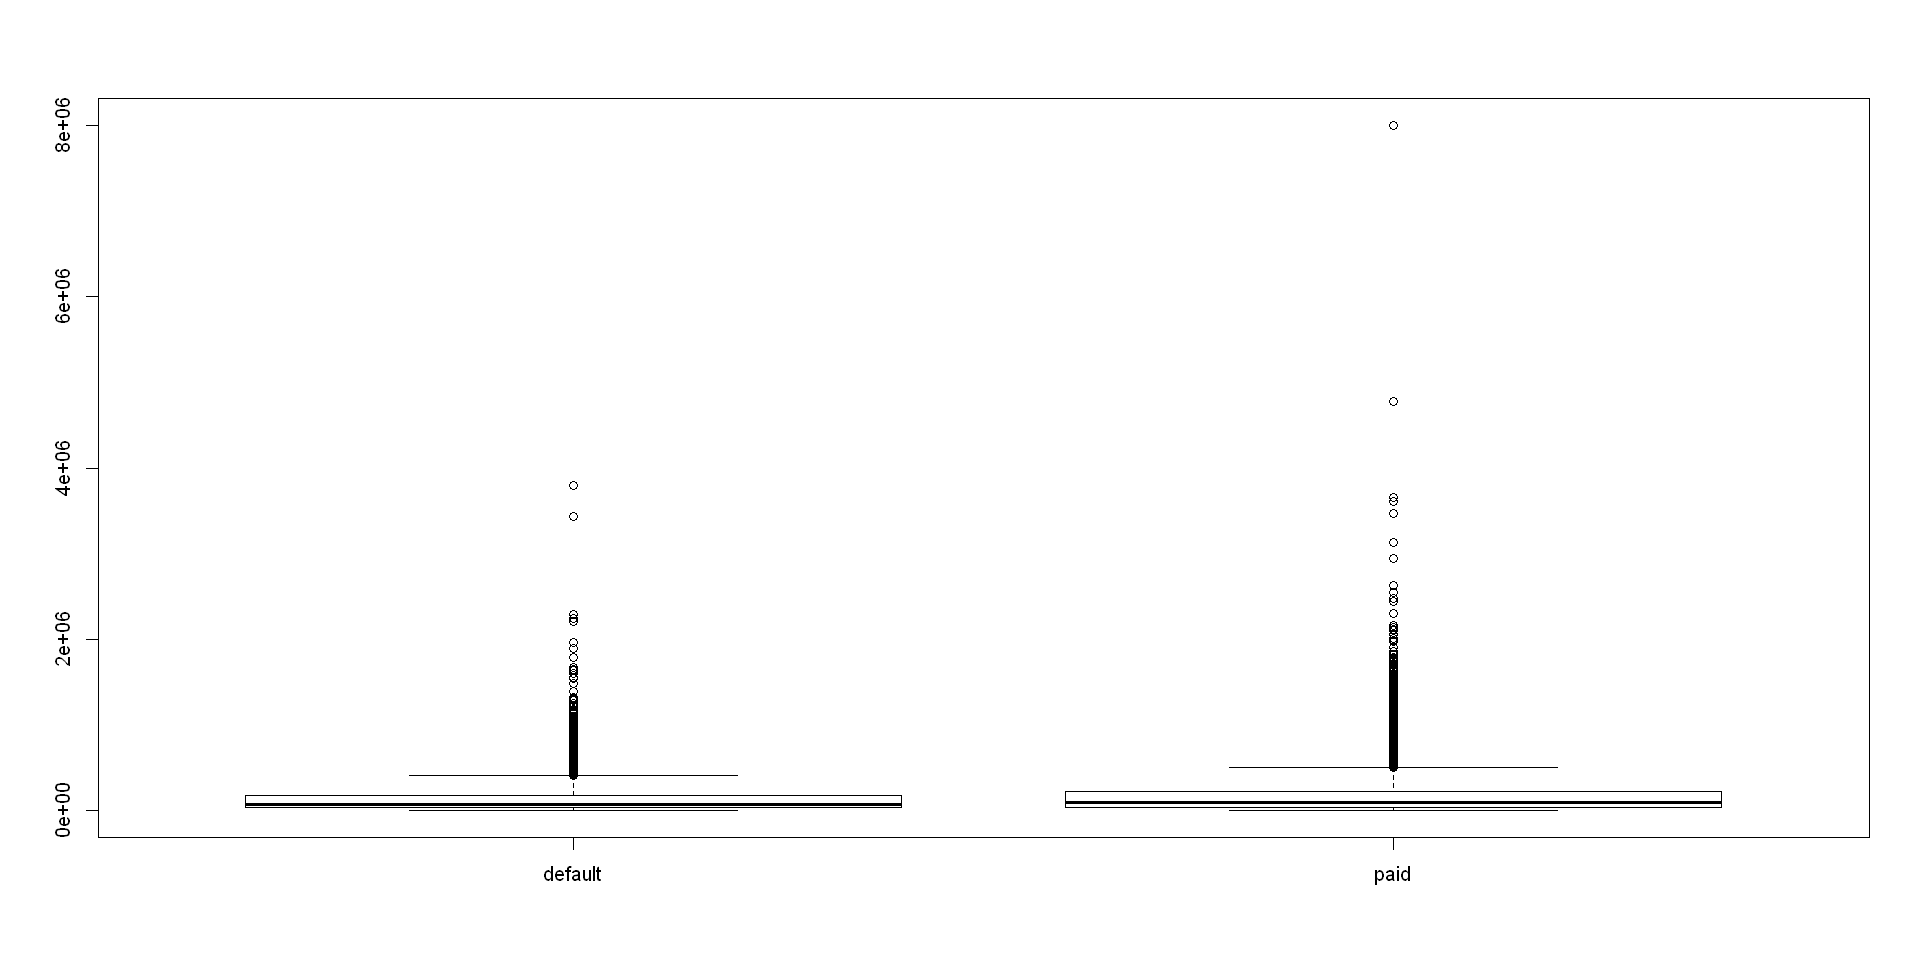

In [206]:
boxplot(default_paid$tot_cur_bal~default_paid$loan_status_1)

In [207]:
t.test(tot_cur_bal ~ loan_status_1, data = default_paid)


	Welch Two Sample t-test

data:  tot_cur_bal by loan_status_1
t = -37.433, df = 117400, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -27132.24 -24432.35
sample estimates:
mean in group default    mean in group paid 
             118009.6              143791.9 


In [222]:
sum(is.na(default_paid$tot_cur_bal))

[1] 66689

In [225]:
#how to impute this?about 1/5 missing of total rows
dim(default_paid)

[1] 277140     58

### open_acc

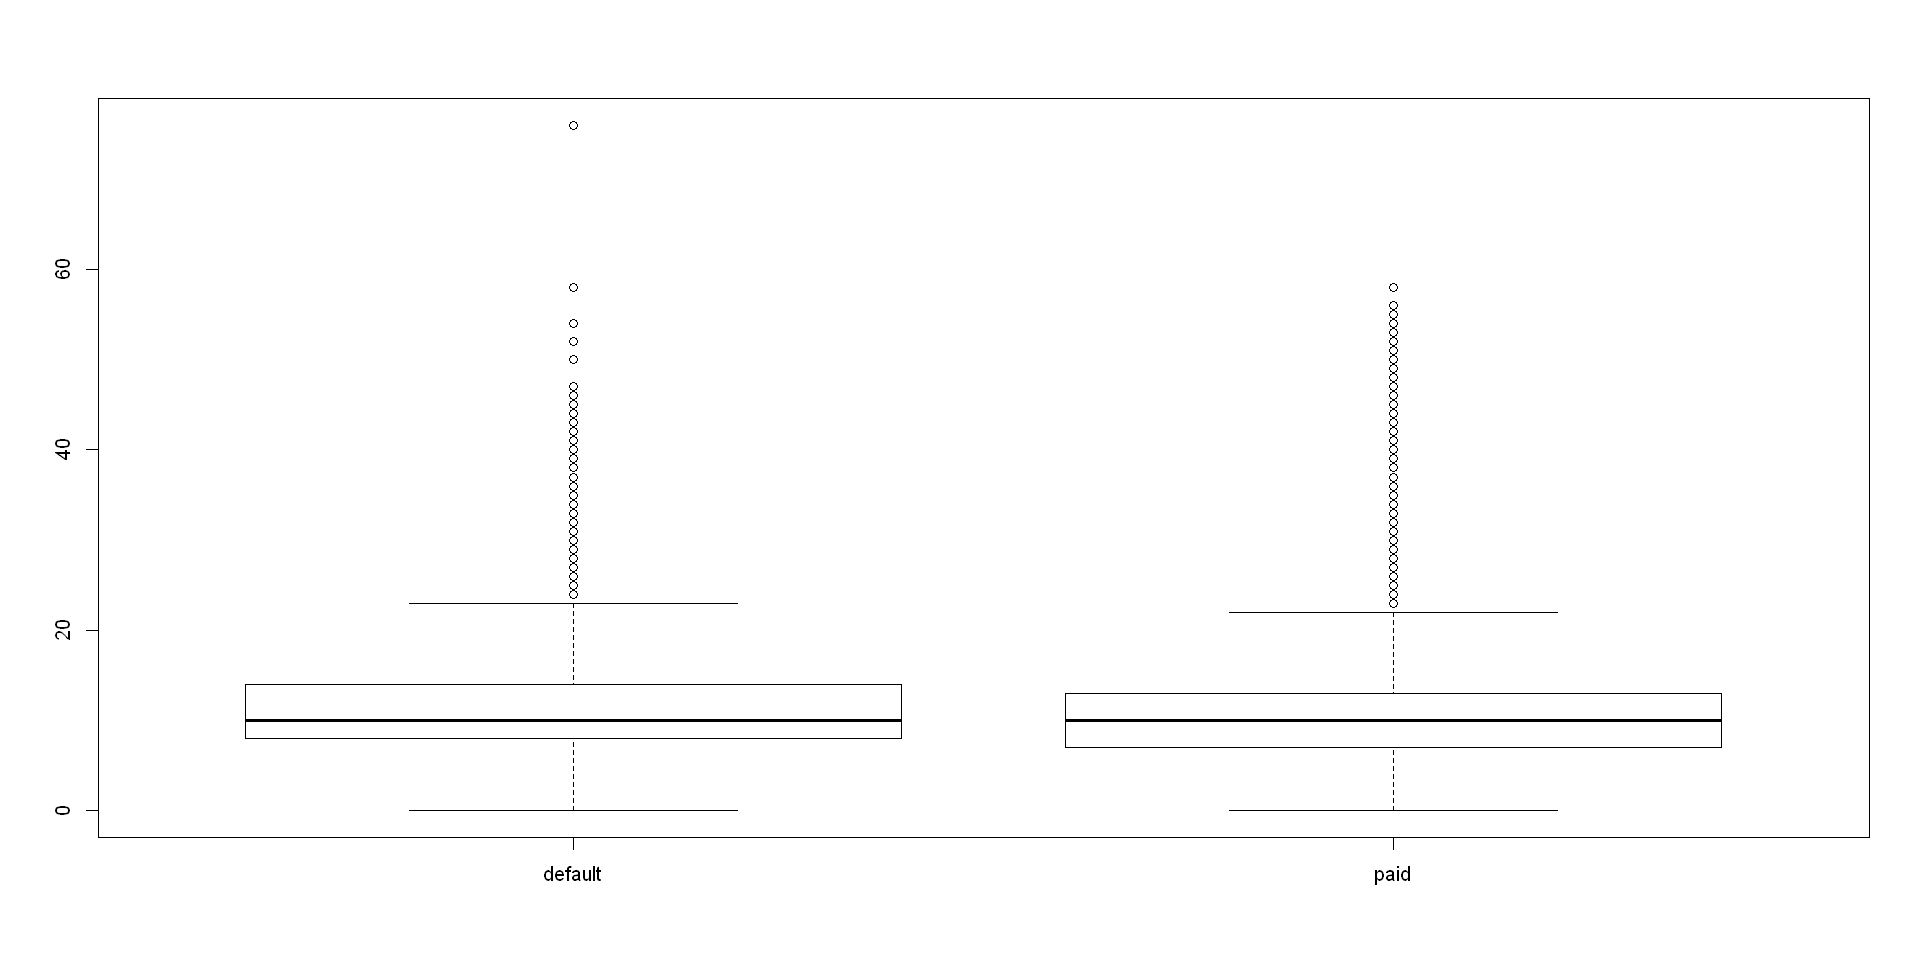

In [226]:
boxplot(default_paid$open_acc~default_paid$loan_status_1)

In [227]:
t.test(open_acc ~ loan_status_1, data = default_paid)


	Welch Two Sample t-test

data:  open_acc by loan_status_1
t = 15.244, df = 110270, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2966131 0.3841401
sample estimates:
mean in group default    mean in group paid 
             11.25069              10.91031 


In [ ]:
sum(is.na(default_paid$open_acc))

In [228]:
#impute missing value 
default_paid$open_acc[is.na(default_paid$open_acc)] = median(default_paid$open_acc,na.rm = T)

### acc_now_delinq

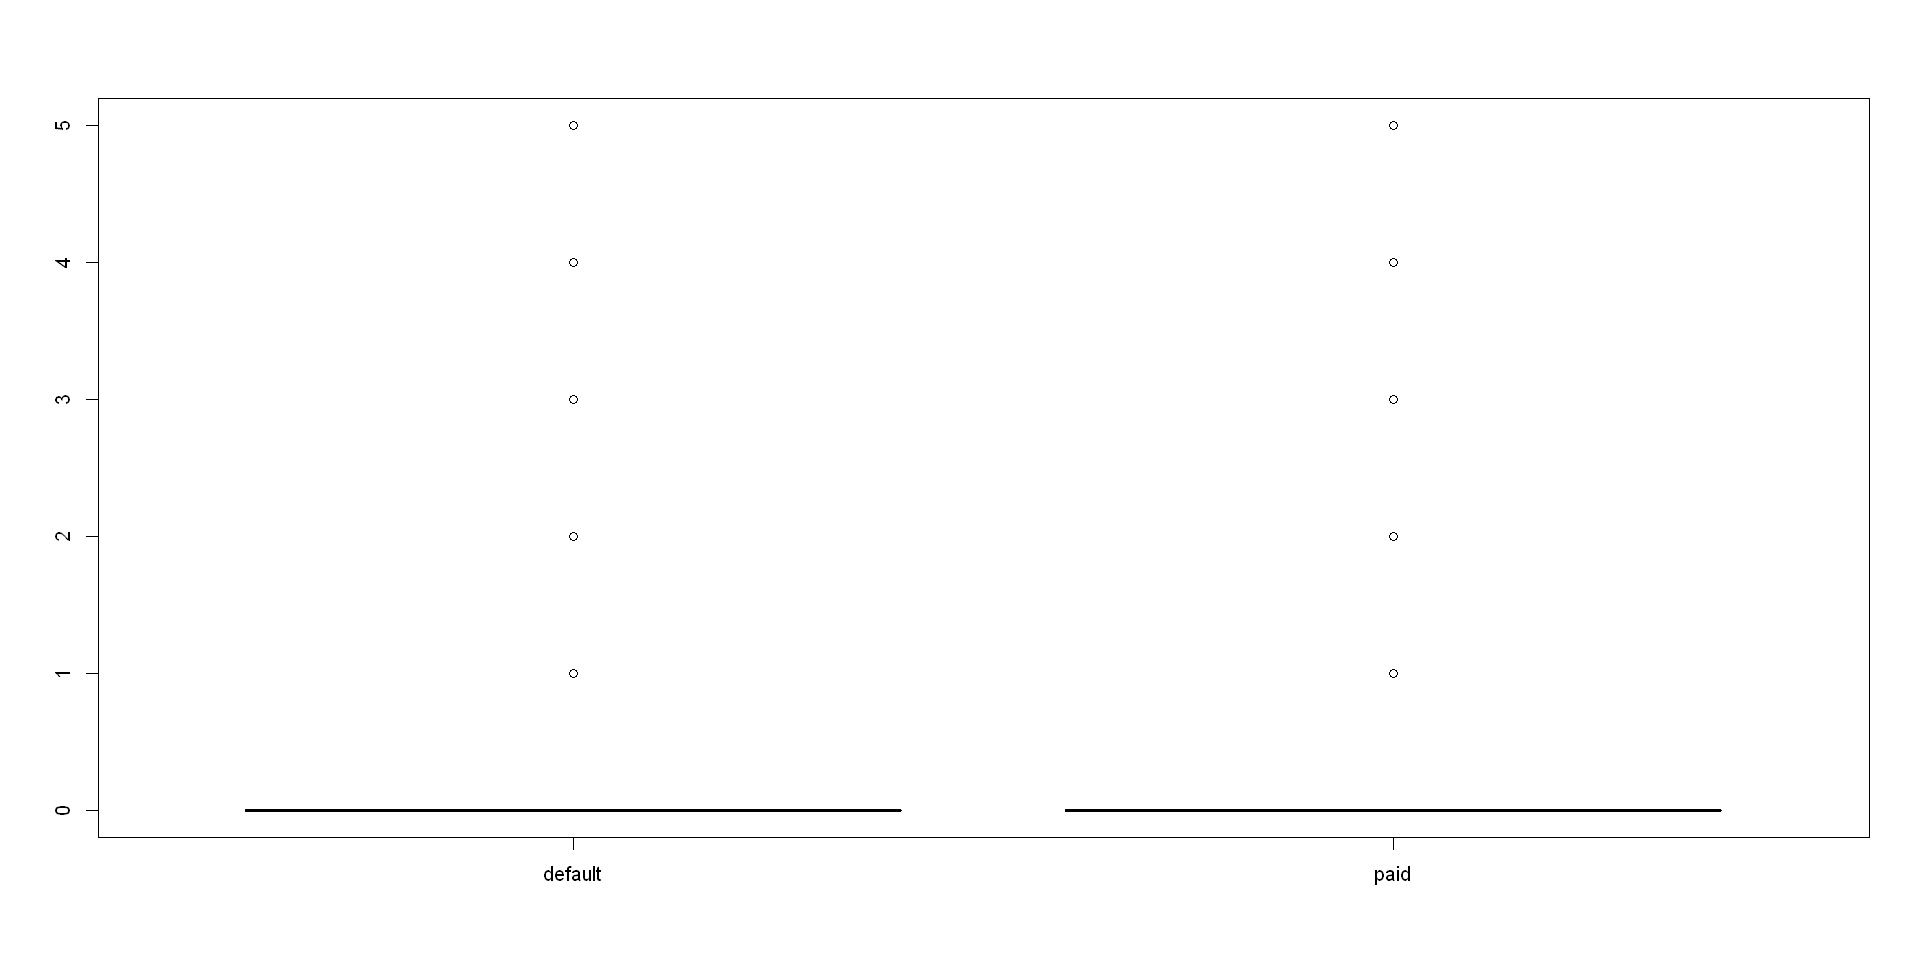

In [230]:
boxplot(default_paid$acc_now_delinq~default_paid$loan_status_1)

In [229]:
t.test(acc_now_delinq ~ loan_status_1, data = default_paid)


	Welch Two Sample t-test

data:  acc_now_delinq by loan_status_1
t = 6.2756, df = 92451, p-value = 3.498e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001409933 0.002690607
sample estimates:
mean in group default    mean in group paid 
          0.004983241           0.002932971 


In [ ]:
sum(is.na(default_paid$open_acc))

In [232]:
#impute missing value 
default_paid$acc_now_delinq[is.na(default_paid$acc_now_delinq)] = median(default_paid$acc_now_delinq,na.rm = T)

### delinq_2yrs

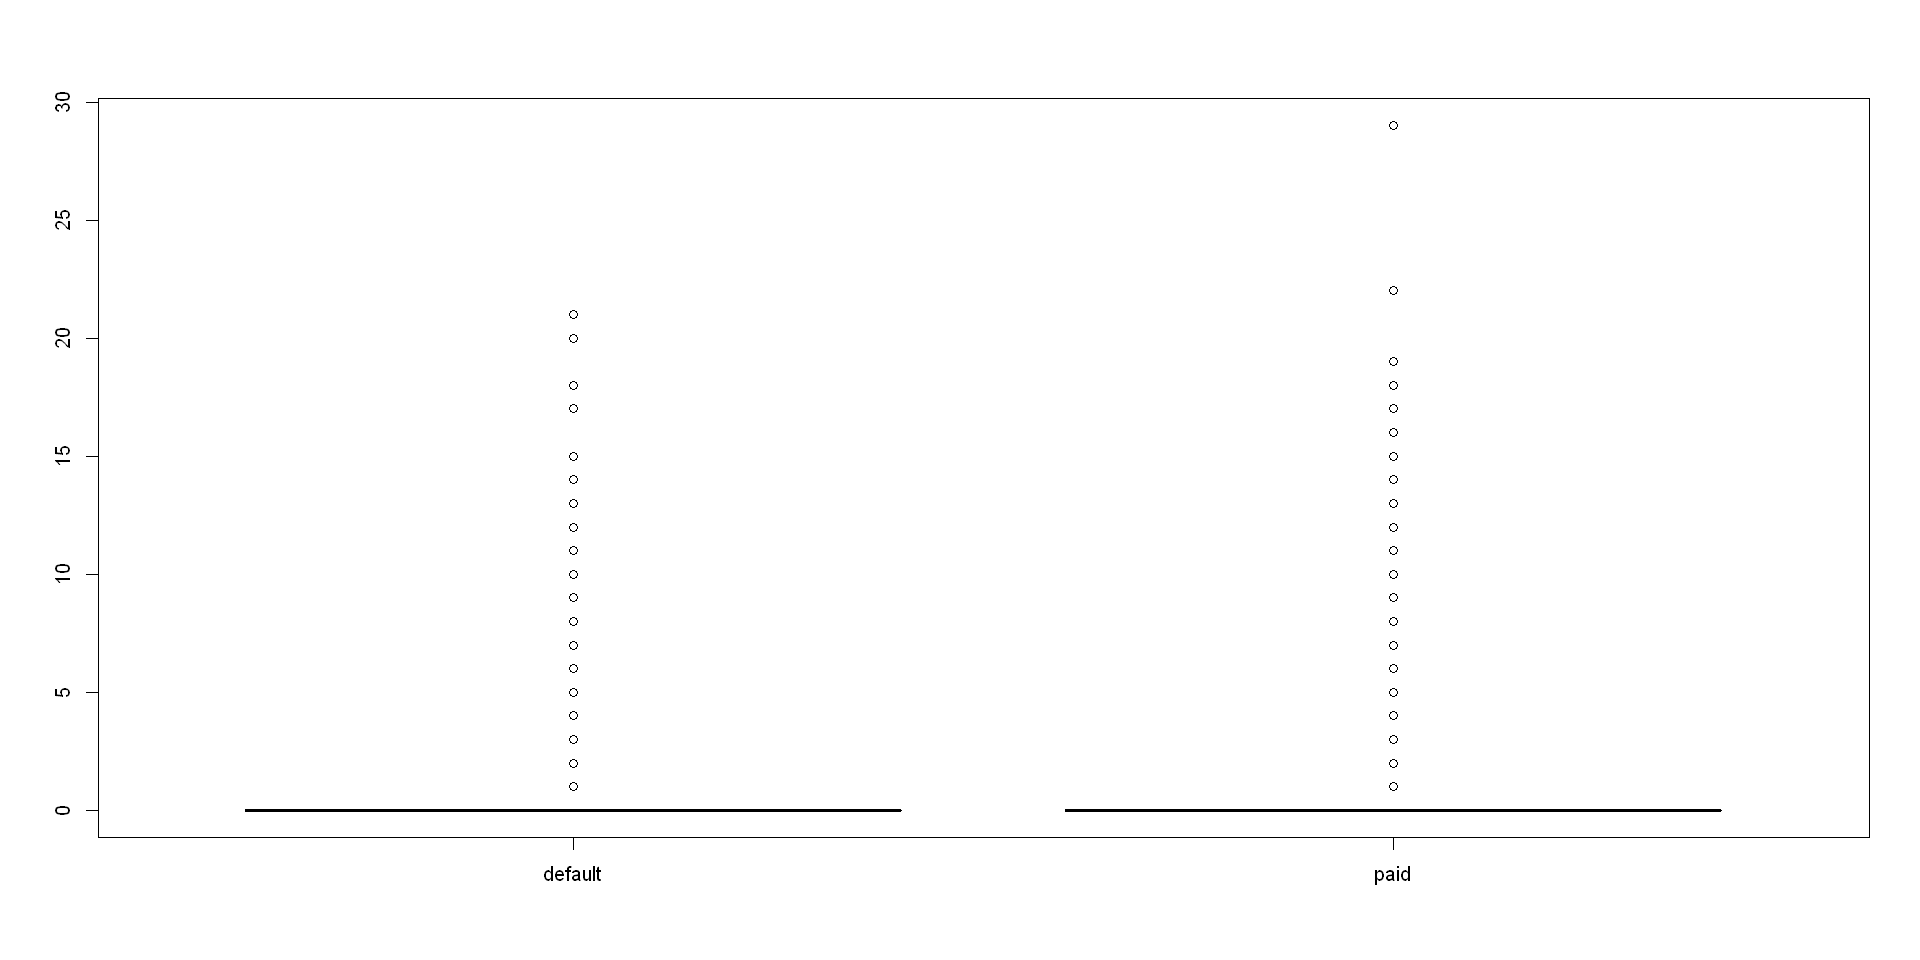

In [233]:
boxplot(default_paid$delinq_2yrs~default_paid$loan_status_1)

In [ ]:
#imbalanced data 

In [240]:
summary(default_paid$acc_now_delinq)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.003431 0.000000 5.000000 

In [241]:
summary(default_paid$delinq_2yrs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.2634  0.0000 29.0000      29 

In [239]:
default_paid[default_paid$acc_now_delinq != 0,c('delinq_2yrs','acc_now_delinq')]

,delinq_2yrs,acc_now_delinq
42411,1,1
42434,1,1
42457,1,1
42475,13,1
43820,3,2
44707,1,1
44949,3,1
46173,1,1
47072,1,1
49205,3,1


In [242]:
#the number of delinq_2yrs include acc_now_delinq
#might need just keep one from acc_now_delinq or delinq_2yrs

In [243]:
sum(is.na(default_paid$delinq_2yrs))

[1] 29

In [244]:
default_paid$delinq_2yrs[is.na(default_paid$delinq_2yrs)] = median(default_paid$delinq_2yrs,na.rm = T)

### collections_12_mths_ex_med

In [247]:
summary(default_paid$collections_12_mths_ex_med)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.00000 0.00754 0.00000 6.00000     145 

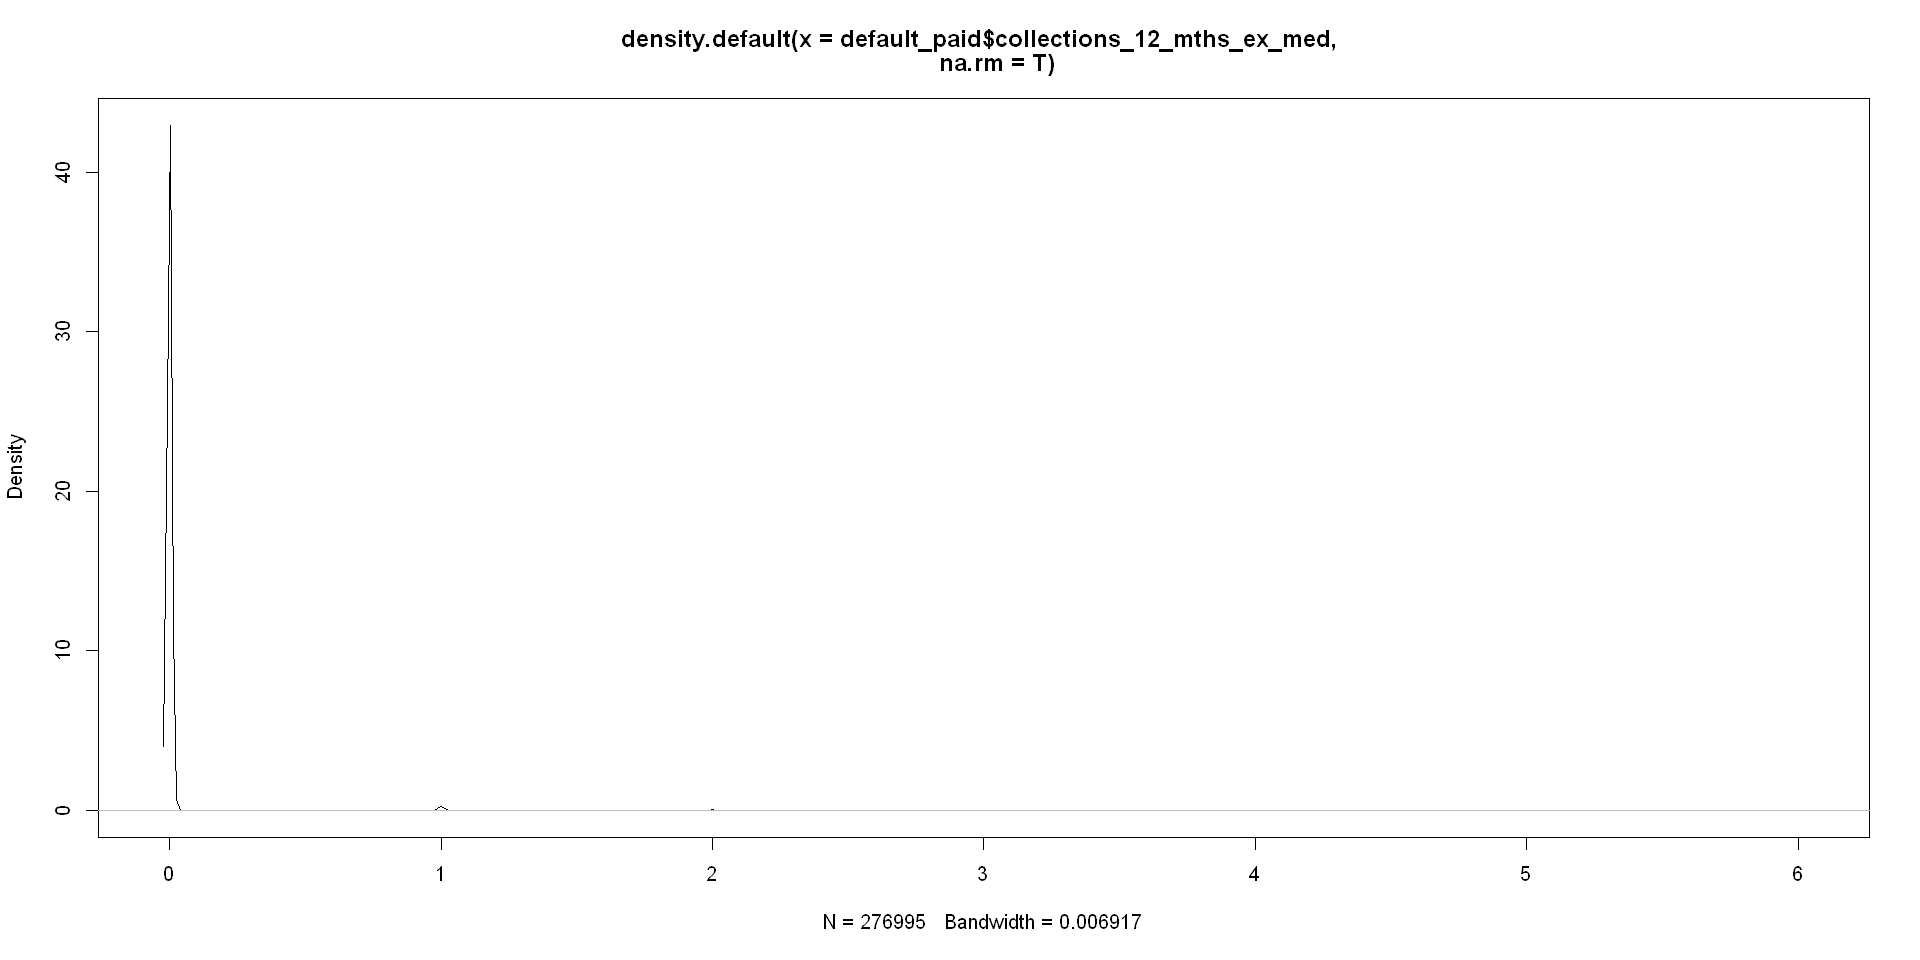

In [249]:
plot(density(default_paid$collections_12_mths_ex_med,na.rm = T))

In [ ]:
sum(is.na(default_paid$collections_12_mths_ex_med))

In [250]:
#impute missing value 
default_paid$collections_12_mths_ex_med[is.na(default_paid$collections_12_mths_ex_med)] = median(default_paid$collections_12_mths_ex_med,na.rm = T)

### tot_coll_amt

In [251]:
sum(is.na(default_paid$tot_coll_amt))

[1] 66689

In [ ]:
#too many na
#how to impute the missing value 

### pub_rec

In [252]:
summary(default_paid$pub_rec)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1487  0.0000 20.0000      29 

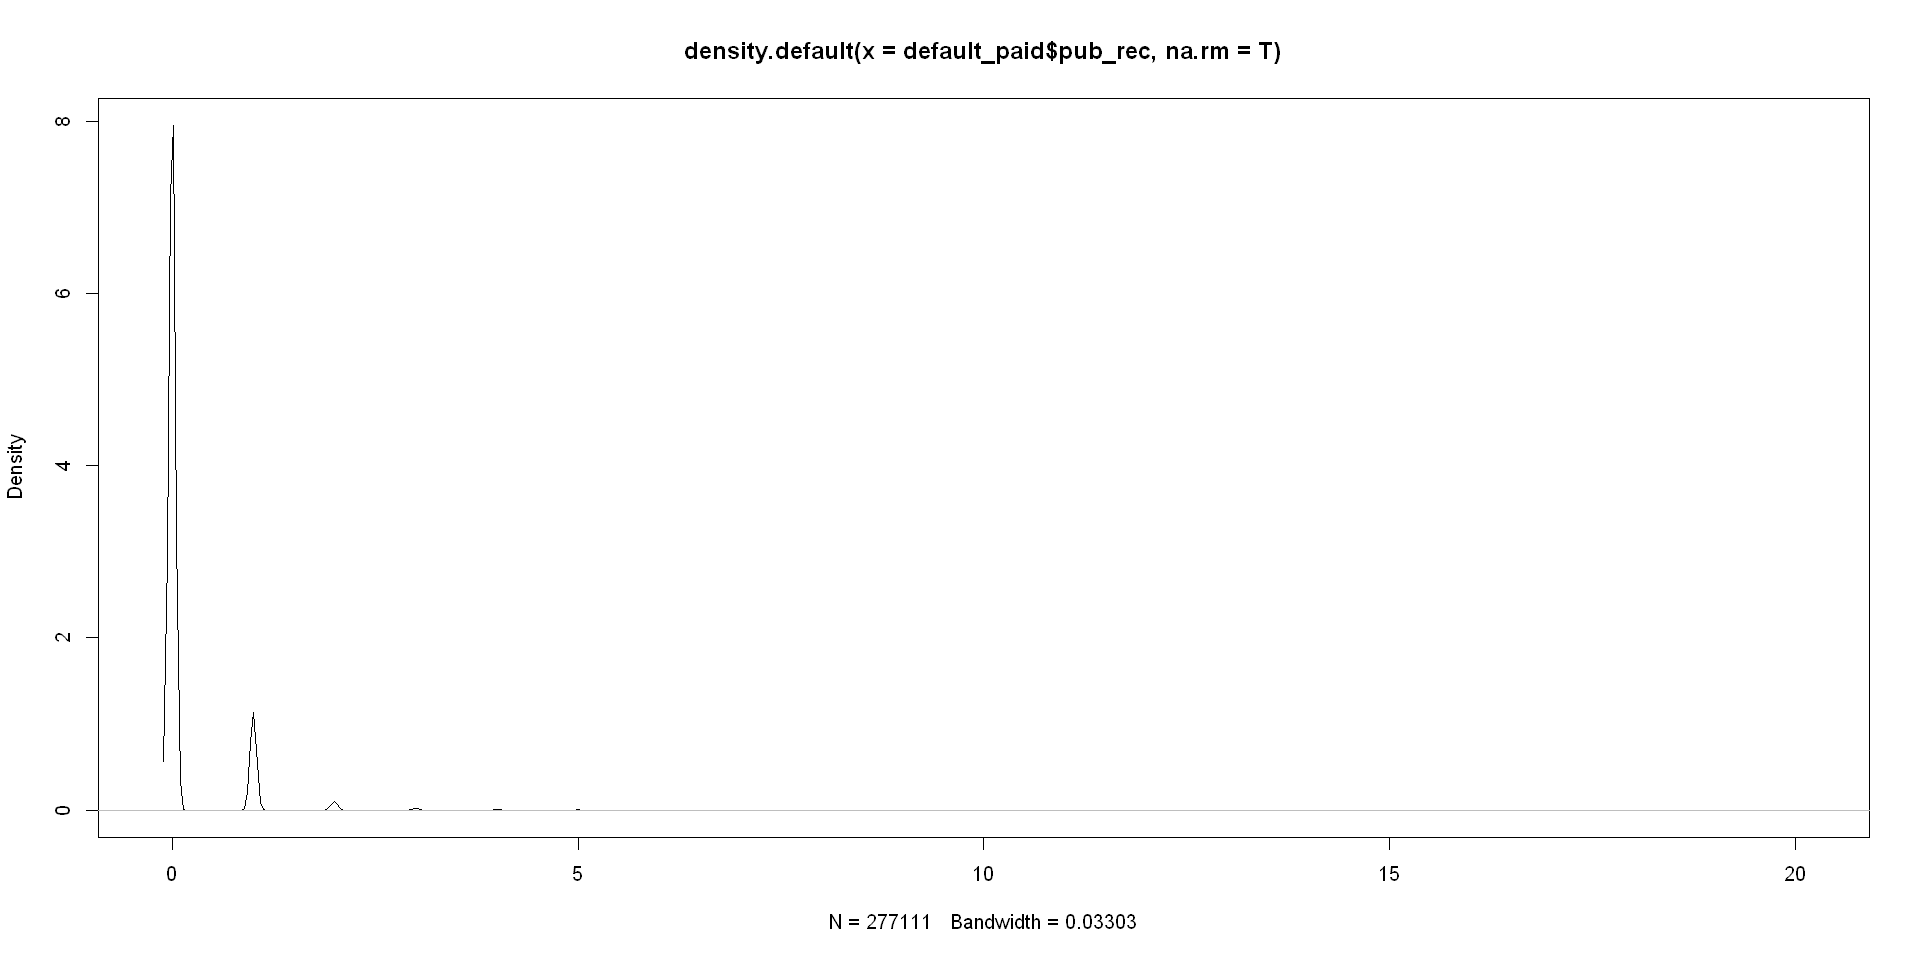

In [253]:
plot(density(default_paid$pub_rec,na.rm = T))

In [ ]:
#show periodic peek

In [ ]:
sum(is.na((default_paid$pub_rec)))

In [261]:
#impute missing value 
default_paid$pub_rec[is.na(default_paid$pub_rec)] = median(default_paid$pub_rec,na.rm = T)

### revol_bal

#Total credit revolving balance
https://www.bankrate.com/glossary/r/revolving-balance/

In [255]:
summary(default_paid$revol_bal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    5850   10927   15320   19099 1746716 

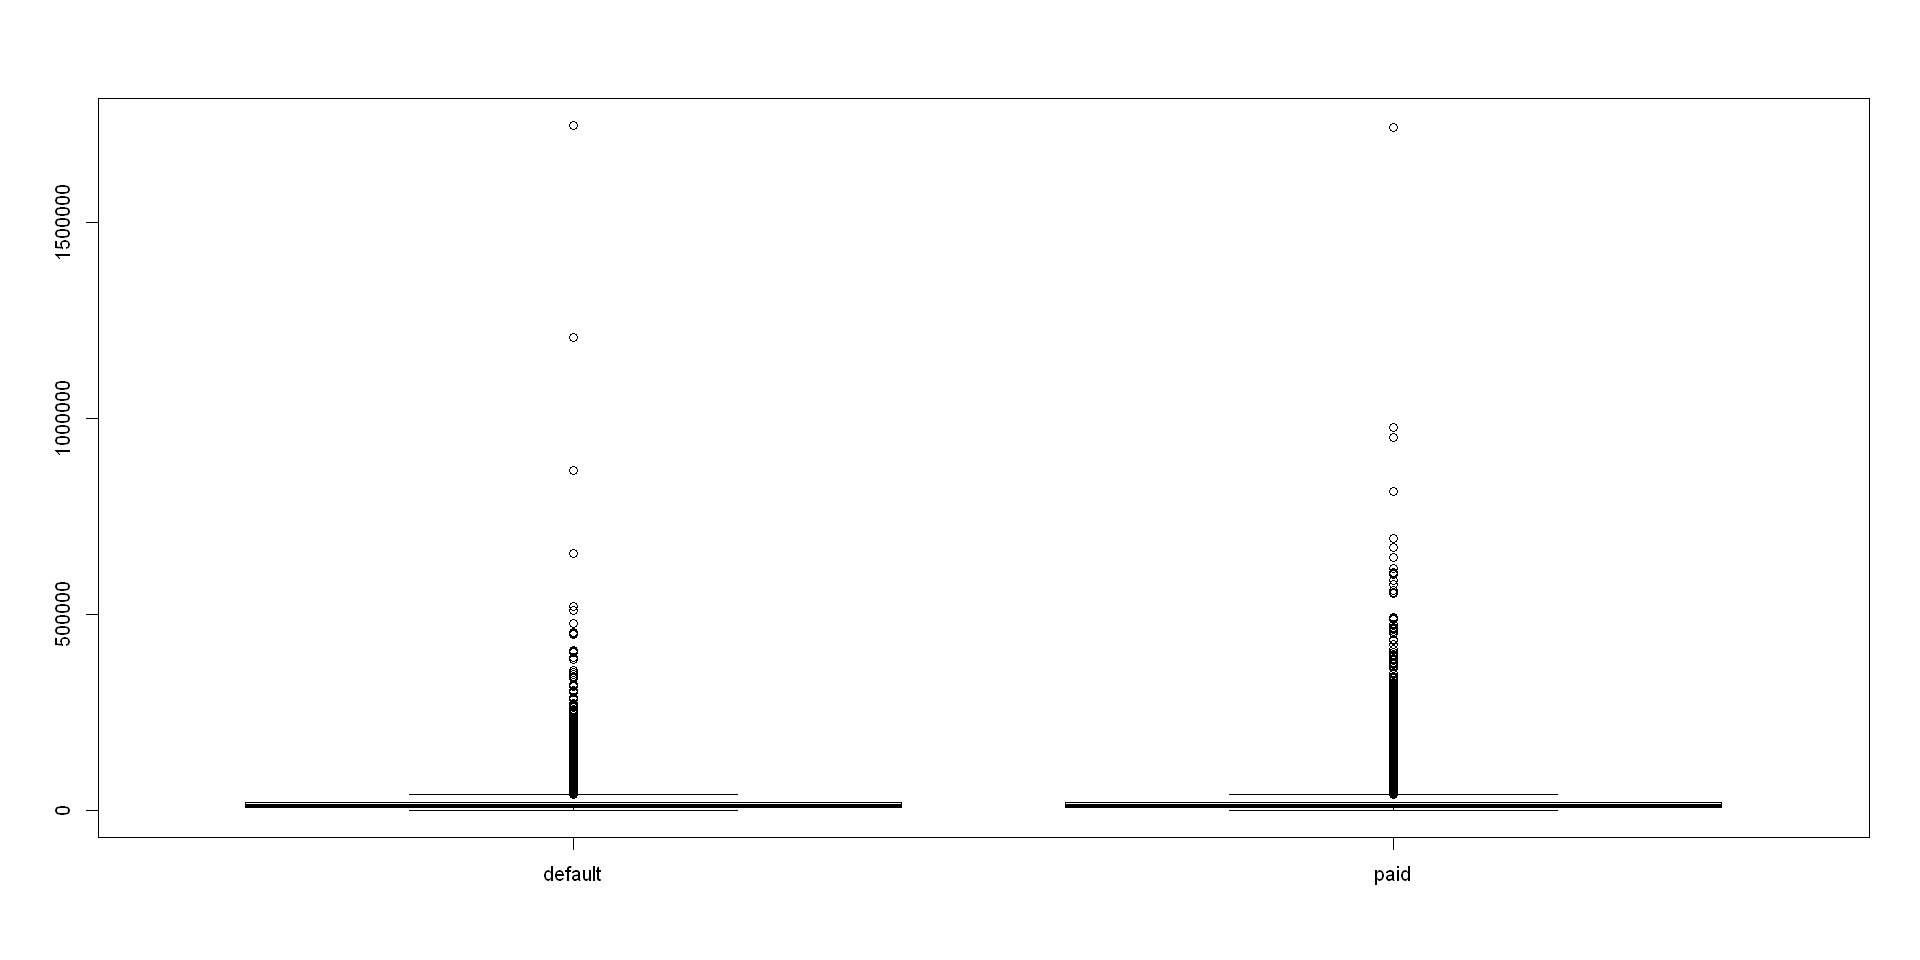

In [256]:
boxplot(default_paid$revol_bal~default_paid$loan_status_1)

In [257]:
t.test(revol_bal ~ loan_status_1, data = default_paid)


	Welch Two Sample t-test

data:  revol_bal by loan_status_1
t = -0.26619, df = 114580, p-value = 0.7901
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -193.9796  147.5900
sample estimates:
mean in group default    mean in group paid 
             15302.83              15326.02 


In [258]:
#no significant difference between two groups

In [259]:
default_paid$revol_bal = NULL

### revol_util

In [260]:
summary(default_paid$revol_util)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   36.70   56.10   54.65   74.20  892.30     253 

In [262]:
sum(is.na((default_paid$revol_util)))

[1] 253

In [263]:
#impute missing value 
default_paid$revol_util[is.na(default_paid$revol_util)] = median(default_paid$revol_util,na.rm = T)

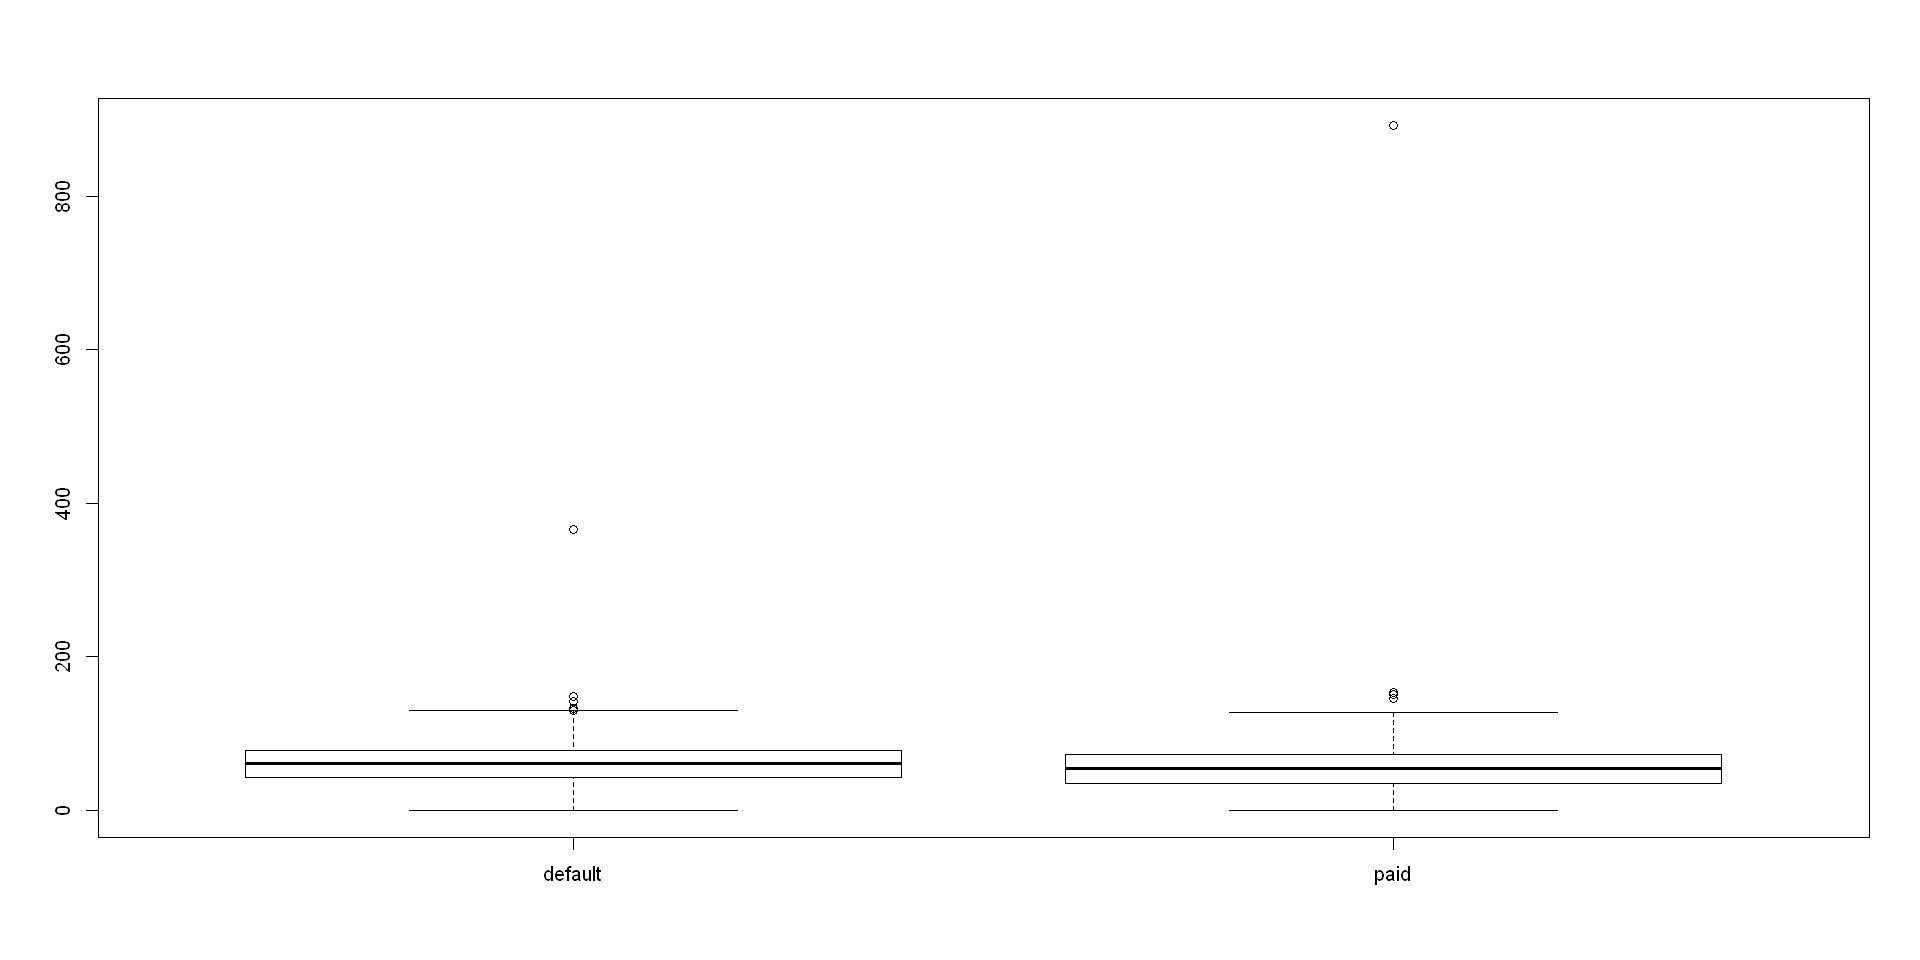

In [264]:
boxplot(default_paid$revol_util~default_paid$loan_status_1)

In [265]:
t.test(revol_util ~ loan_status_1, data = default_paid)


	Welch Two Sample t-test

data:  revol_util by loan_status_1
t = 57.184, df = 119790, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.844542 6.259407
sample estimates:
mean in group default    mean in group paid 
             59.23240              53.18042 


### total_rev_hi_lim

In [266]:
summary(default_paid$total_rev_hi_lim)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   13200   22010   29436   36500 2013133   66689 

In [267]:
#too many na

### application_type

In [269]:
table(default_paid$application_type, default_paid$loan_status)

            
             Charged Off Default Fully Paid In Grace Period Late (16-30 days)
  INDIVIDUAL       46009    1219     209710            6250              2357
  JOINT                0       0          1               3                 0
            
             Late (31-120 days)
  INDIVIDUAL              11589
  JOINT                       2

In [271]:
table(loanT$application_type)


INDIVIDUAL      JOINT 
    886868        511 

In [273]:
#imbalanced data --> drop
default_paid$application_type = NULL

### desc

In [274]:
#NLP later--> drop here
default_paid$desc = NULL

### id

In [293]:
#drop id: useless
default_paid$id = NULL

### purpose

In [276]:
table(default_paid$purpose)


               car        credit_card debt_consolidation        educational 
              3845              54276             163180                422 
  home_improvement              house     major_purchase            medical 
             16356               1816               6785               3125 
            moving              other   renewable_energy     small_business 
              2241              15807                287               5245 
          vacation            wedding 
              1733               2022 

In [277]:
table(default_paid$purpose, default_paid$loan_status)

                    
                     Charged Off Default Fully Paid In Grace Period
  car                        461      10       3249              40
  credit_card               7895     233      42521            1150
  debt_consolidation       27891     790     121572            3998
  educational                 88       0        334               0
  home_improvement          2340      47      12803             367
  house                      297       7       1399              37
  major_purchase             897      14       5491             125
  medical                    591      15       2321              56
  moving                     440      11       1634              43
  other                     3057      65      11644             310
  renewable_energy            55       0        215               8
  small_business            1443      19       3464              79
  vacation                   276       8       1331              37
  wedding                  

In [279]:
with(default_paid, chisq.test(purpose, loan_status_1))


	Pearson's Chi-squared test

data:  purpose and loan_status_1
X-squared = 1084.2, df = 13, p-value < 2.2e-16


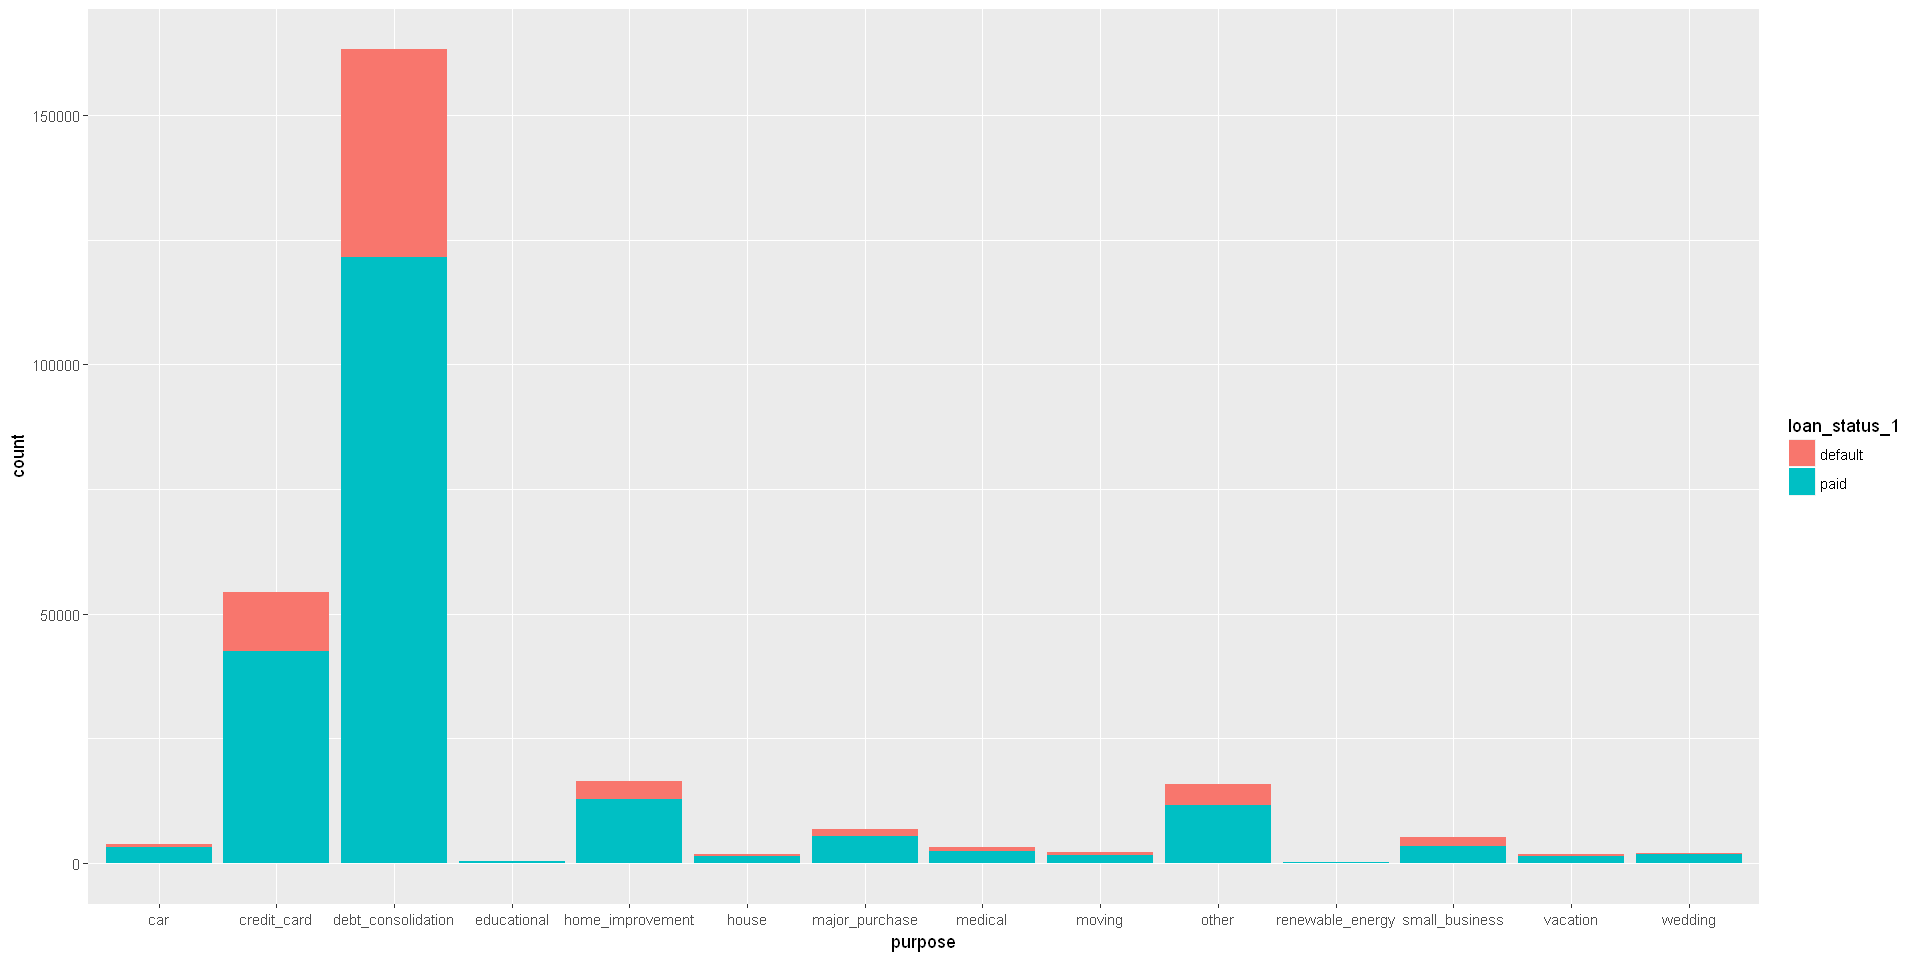

In [280]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = purpose, fill = loan_status_1))

In [281]:
pu1 = default_paid %>% filter(loan_status_1 == "default") %>% group_by(purpose) %>% summarise(default_count = n())
pu2 = default_paid %>% group_by(purpose) %>% summarise(count = n())
pu3 = pu2 %>% left_join(pu1) %>% mutate(default_rate = 100*default_count/count) %>% select(purpose,count,default_count,default_rate)

Joining, by = "purpose"


In [285]:
pu3[order(pu3$default_rate),]

purpose,count,default_count,default_rate
wedding,2022,289,14.29278
car,3845,596,15.50065
major_purchase,6785,1294,19.07148
educational,422,88,20.85308
credit_card,54276,11755,21.65782
home_improvement,16356,3553,21.72292
house,1816,417,22.96256
vacation,1733,402,23.19677
renewable_energy,287,72,25.08711
debt_consolidation,163180,41608,25.49822


### term

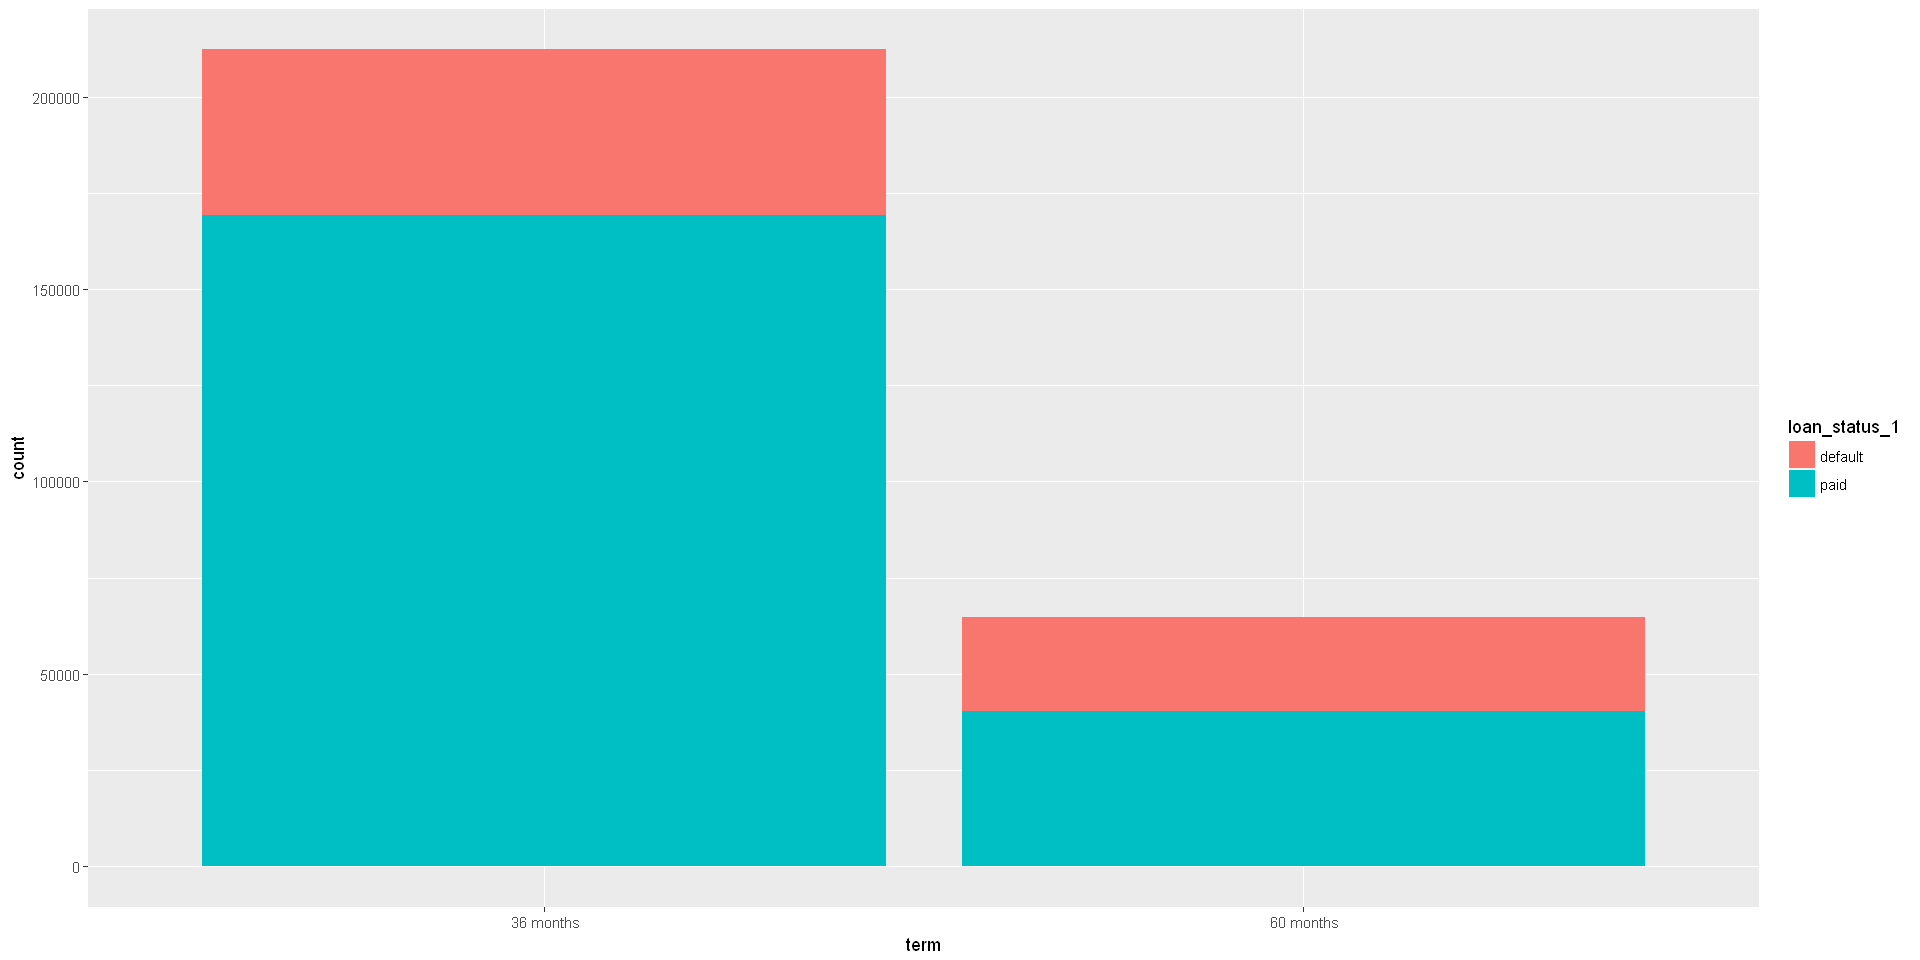

In [294]:
ggplot(data = default_paid) + geom_bar(mapping = aes(x = term, fill = loan_status_1))

In [295]:
with(default_paid, chisq.test(term, loan_status_1))


	Pearson's Chi-squared test with Yates' continuity correction

data:  term and loan_status_1
X-squared = 8315.7, df = 1, p-value < 2.2e-16


### title

In [1]:
length(unique(default_paid$title))

ERROR: Error in unique(default_paid$title): object 'default_paid' not found


In [297]:
#NLP but drop here
default_paid$title = NULL

### issue_d

In [298]:
table(default_paid$issue_d_y, default_paid$loan_status_1)

      
       default  paid
  2007     158   445
  2008     496  1897
  2009     723  4558
  2010    1761 10769
  2011    3298 16470
  2012    8444 41479
  2013   18095 56396
  2014   22357 54713
  2015   12097 22984

In [299]:
is1 = default_paid %>% filter(loan_status_1 == "default") %>% group_by(issue_d_y) %>% summarise(default_count = n())
is2 = default_paid %>% group_by(issue_d_y) %>% summarise(count = n())
is3 = is2 %>% left_join(is1) %>% mutate(default_rate = 100*default_count/count) %>% select(issue_d_y,count,default_count,default_rate)

Joining, by = "issue_d_y"


In [302]:
is3[order(is3$default_rate),]

issue_d_y,count,default_count,default_rate
2009,5281,723,13.69059
2010,12530,1761,14.05427
2011,19768,3298,16.68353
2012,49923,8444,16.91405
2008,2393,496,20.72712
2013,74491,18095,24.29153
2007,603,158,26.20232
2014,77070,22357,29.00869
2015,35081,12097,34.48305


In [303]:
#drop here due to the relationship with loan_status
default_paid$issue_d = NULL

### initial_list_status

initial_list_status

In [305]:
table(default_paid$initial_list_status, default_paid$loan_status_1)

   
    default   paid
  f   45086 151134
  w   22343  58577

In [308]:
sort(sapply(default_paid, function(x) sum(length(which(is.na(x))))))

revol_util collections_12_mths_ex_med 
                         0                          0 
               delinq_2yrs             inq_last_6mths 
                         0                          0 
                  open_acc                    pub_rec 
                         0                          0 
                 total_acc             acc_now_delinq 
                         0                          0 
                annual_inc                  loan_amnt 
                         0                          0 
               funded_amnt            funded_amnt_inv 
                         0                          0 
                      term                   int_rate 
                         0                          0 
               installment                      grade 
                         0                          0 
                 sub_grade                  emp_title 
                         0                          0 
                emp_length             home_ownership 
                         0                          0 
       verification_status                loan_status 
                         0                          0 
                pymnt_plan                        url 
                         0                          0 
                   purpose                 addr_state 
                         0                          0 
                       dti        initial_list_status 
                         0                          0 
                 out_prncp              out_prncp_inv 
                         0                          0 
               total_pymnt            total_pymnt_inv 
                         0                          0 
           total_rec_prncp              total_rec_int 
                         0                          0 
        total_rec_late_fee                 recoveries 
                         0                          0 
   collection_recovery_fee               last_pymnt_d 
                         0                          0 
           last_pymnt_amnt               next_pymnt_d 
                         0                          0 
               policy_code  verification_status_joint 
                         0                          0 
             loan_status_1              loan_status_2 
                         0                          0 
                 issue_d_1                  issue_d_y 
                         0                          0 
             state_default           earliest_cr_line 
                         0                         29 
        earliest_cr_line_y               tot_coll_amt 
                        29                      66689 
               tot_cur_bal           total_rev_hi_lim 
                     66689                      66689

In [309]:
dim(default_paid)

[1] 277140     52